In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [48]:
import matplotlib
print(matplotlib.matplotlib_fname())
plt.rcParams["font.family"] = "NanumGothic"

C:\Users\qkfkd\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [49]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

In [50]:
print(f'train의 구조 {train_df.shape}')
print(f'test의 구조 {test_df.shape}')
print(f'submission의 구조 {submission.shape}')

train의 구조 (1350, 14)
test의 구조 (1350, 13)
submission의 구조 (1350, 2)


In [51]:
# 전체 컬럼들 기준으로 중복값 제거
train_df = train_df.drop_duplicates()
print("제거 후 : ", train_df.shape)

제거 후 :  (1349, 14)


In [52]:
train_df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1349 non-null   int64 
 1   Gr Liv Area     1349 non-null   int64 
 2   Exter Qual      1349 non-null   object
 3   Garage Cars     1349 non-null   int64 
 4   Garage Area     1349 non-null   int64 
 5   Kitchen Qual    1349 non-null   object
 6   Total Bsmt SF   1349 non-null   int64 
 7   1st Flr SF      1349 non-null   int64 
 8   Bsmt Qual       1349 non-null   object
 9   Full Bath       1349 non-null   int64 
 10  Year Built      1349 non-null   int64 
 11  Year Remod/Add  1349 non-null   int64 
 12  Garage Yr Blt   1349 non-null   int64 
 13  target          1349 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.1+ KB


In [101]:
numeric_features = train_df.columns[(train_df.dtypes == "float64") | (train_df.dtypes == "int64")]

categorical_features = train_df.columns[(train_df.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars', 'target']
범주형 데이터는 다음과 같습니다. 
  ['Exter Qual', 'Bsmt Qual', 'Kitchen Qual']


In [102]:
cols1=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars', 'target']
train_df = train_df[cols1]

cols2=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars']
test_df=test_df[cols2]
train_df.head(3)

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000


# train.csv : 학습 데이터
- id : 데이터 고유 id (drop)
- OverallQual : 전반적 재료와 마감 품질
- KitchenQual : 부억 품질 
- ExterQual : 외관 재료 품질

- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 

- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

## 수치형 데이터는 다음과 같음
- 이상치 나타나는 feature : 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Garage Yr Blt', 'target'

In [103]:
numeric_features

Index(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual',
       'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area',
       'Full Bath', 'Garage Cars', 'target'],
      dtype='object')

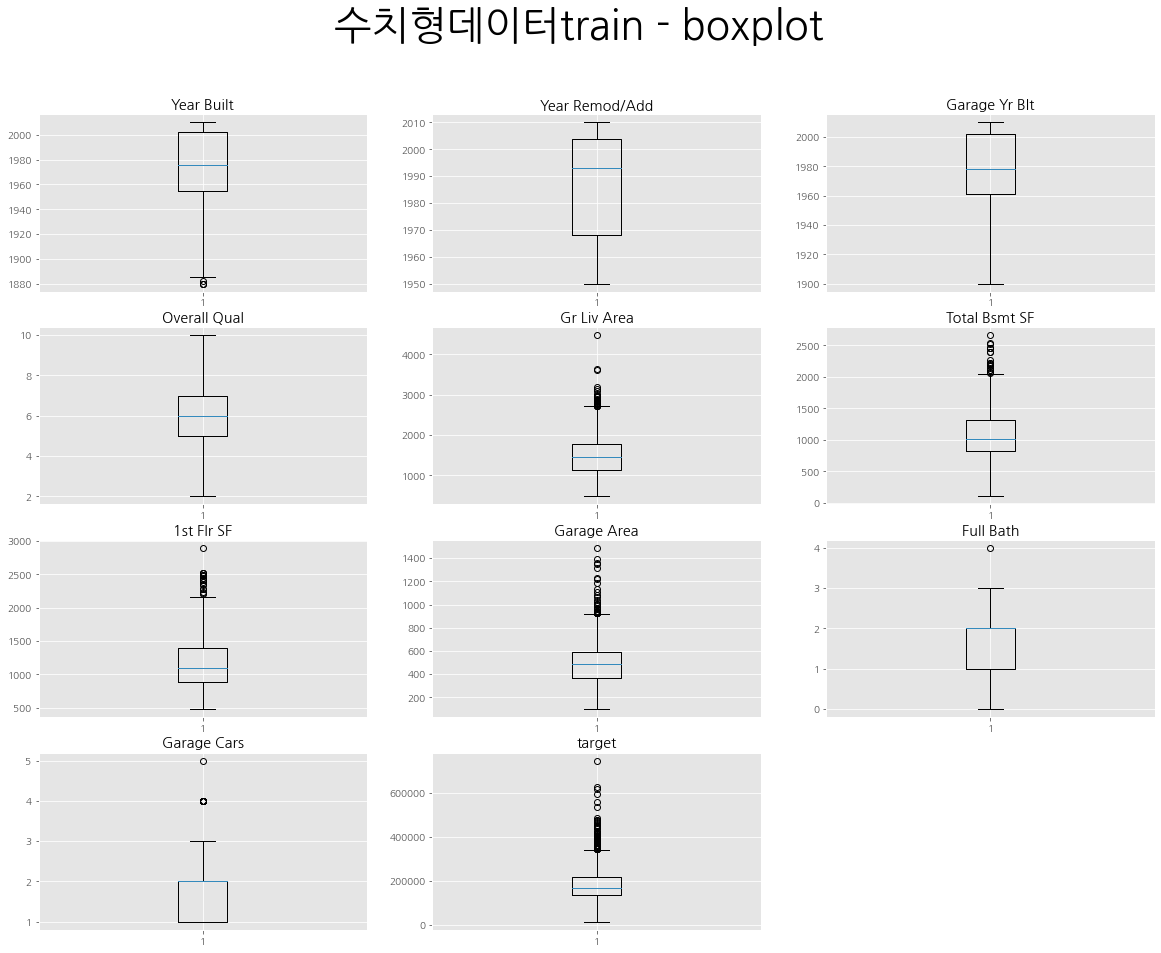

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train_df[feature[i]])
plt.show()

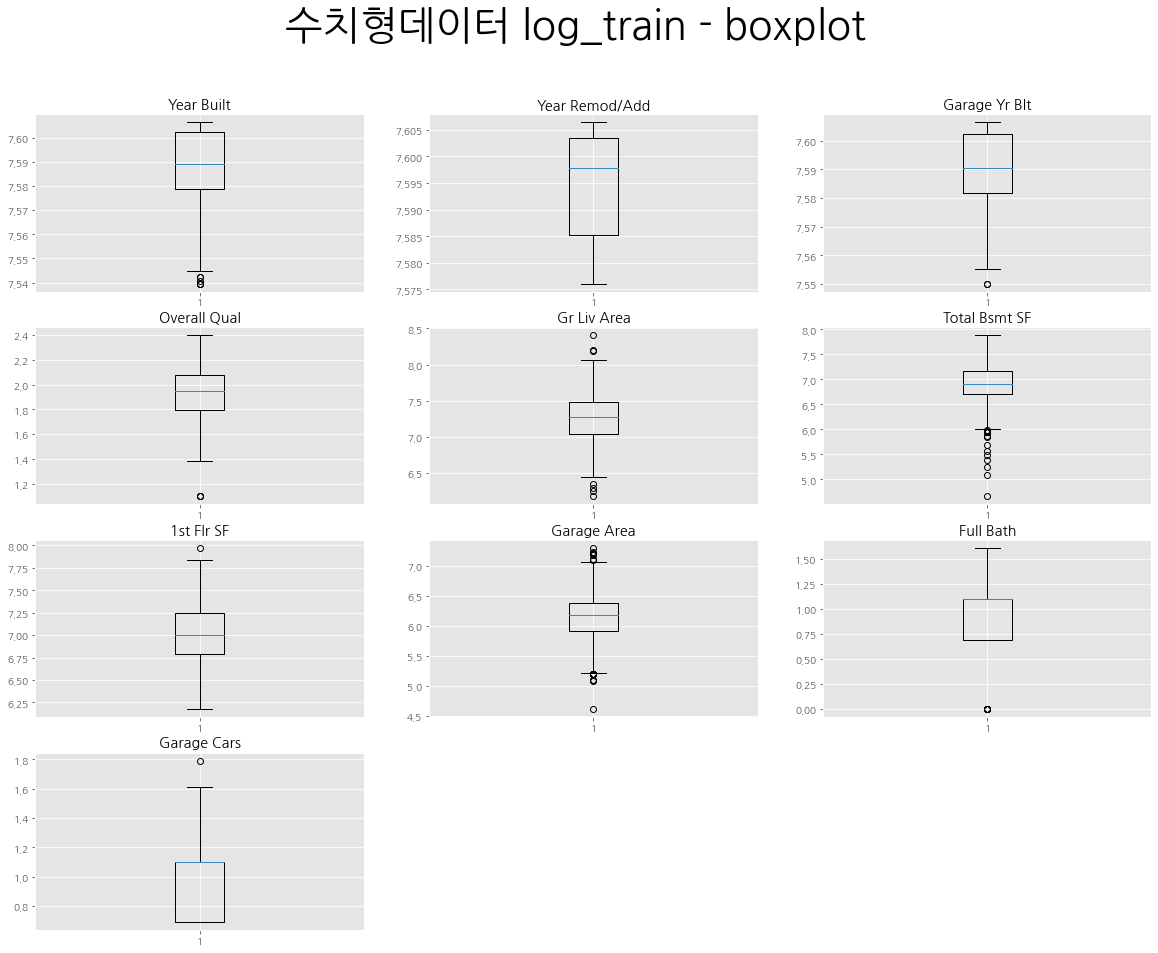

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

numeric_features_del_target = list(numeric_features)
numeric_features_del_target.remove('target')
feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 log_train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(np.log1p(train_df[numeric_features_del_target])[feature[i]])
plt.show()

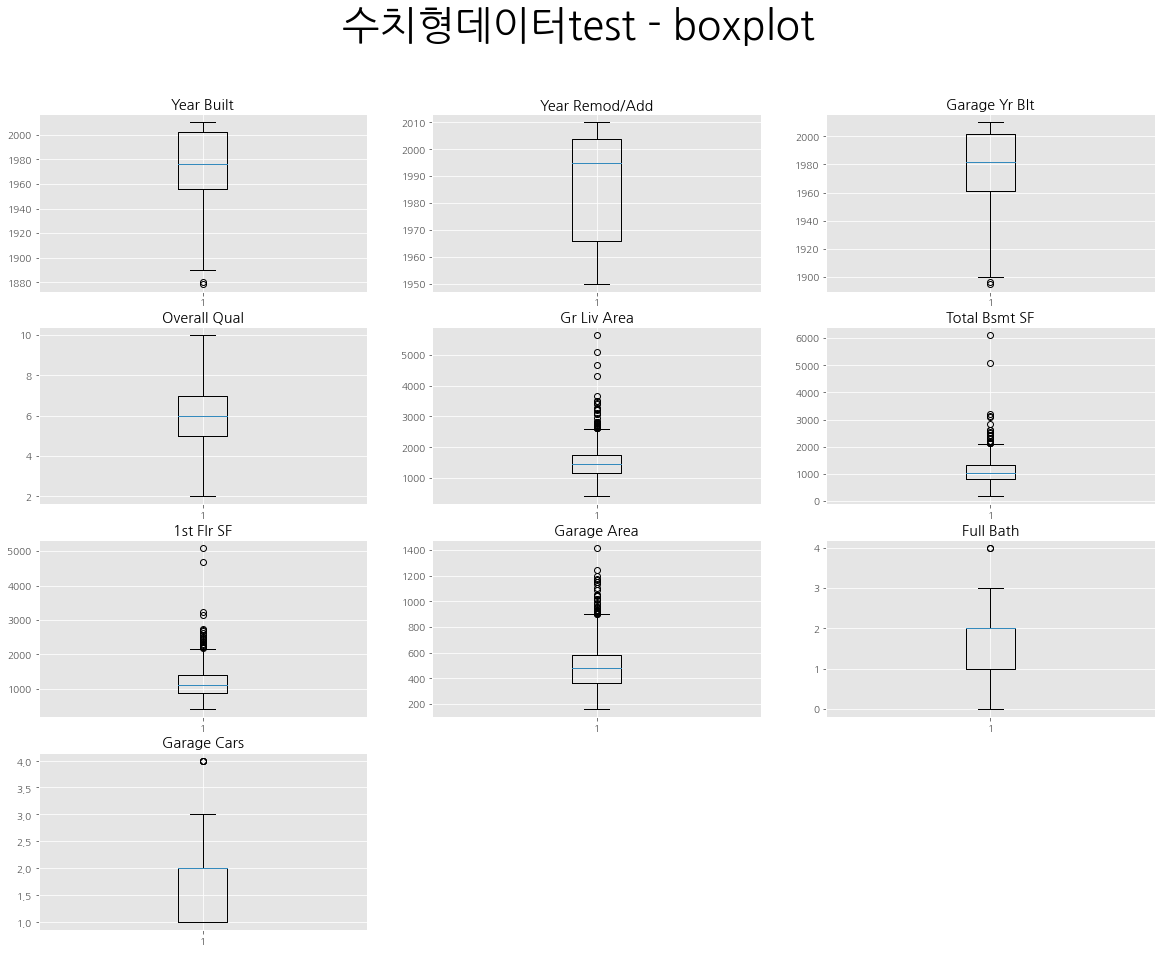

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

numeric_features_del_target = list(numeric_features)
numeric_features_del_target.remove('target')
feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터test - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(test_df[feature[i]])
plt.show()

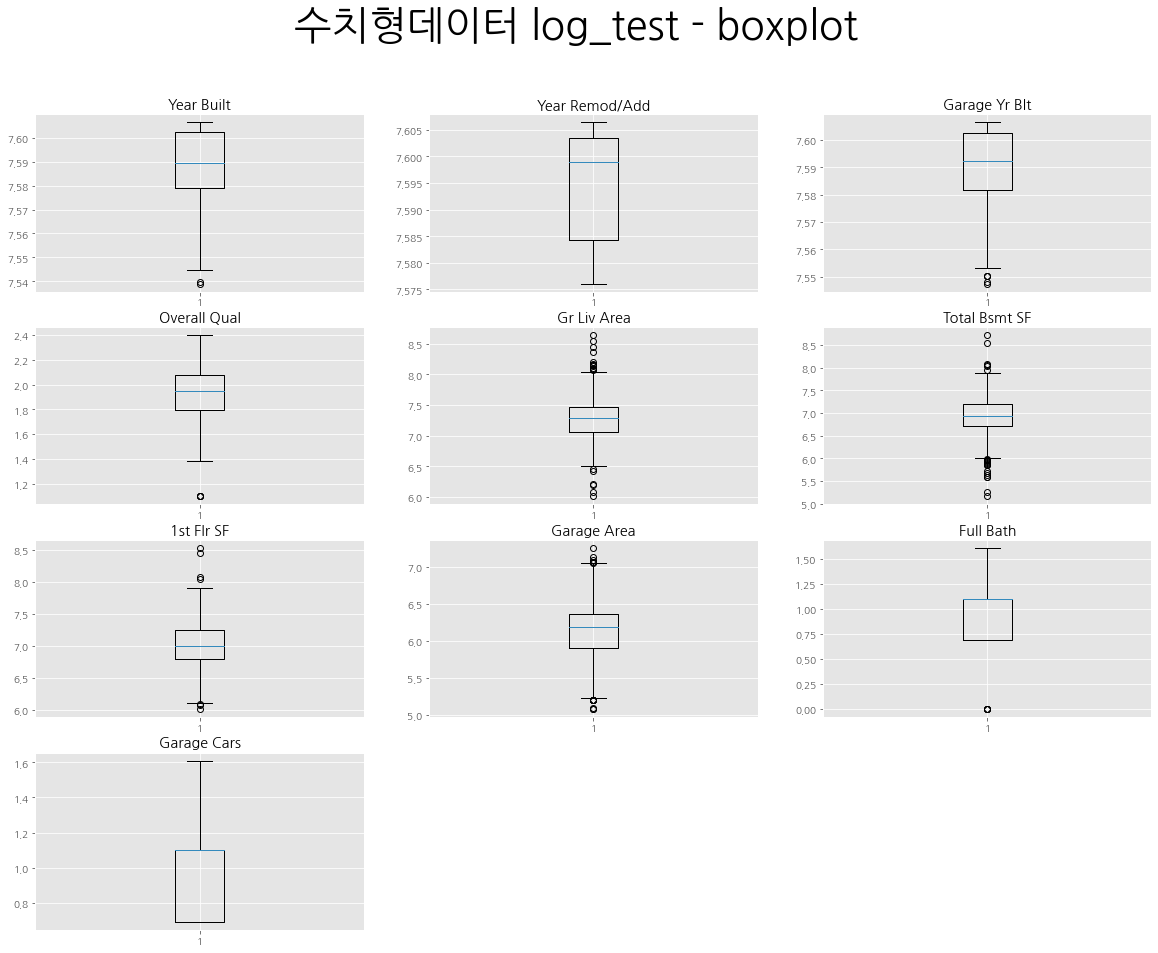

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

numeric_features_del_target = list(numeric_features)
numeric_features_del_target.remove('target')
feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 log_test - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(np.log1p(test_df[numeric_features_del_target])[feature[i]])
plt.show()

In [ ]:
# train Garage Cars 5,4개 짜리 3개로 바꿔주기
# Gr Liv Area 맨 위 4개쯤
# Total Bsmt SF 맨 위 2개
# 1st Flr SF 맨 위 2개

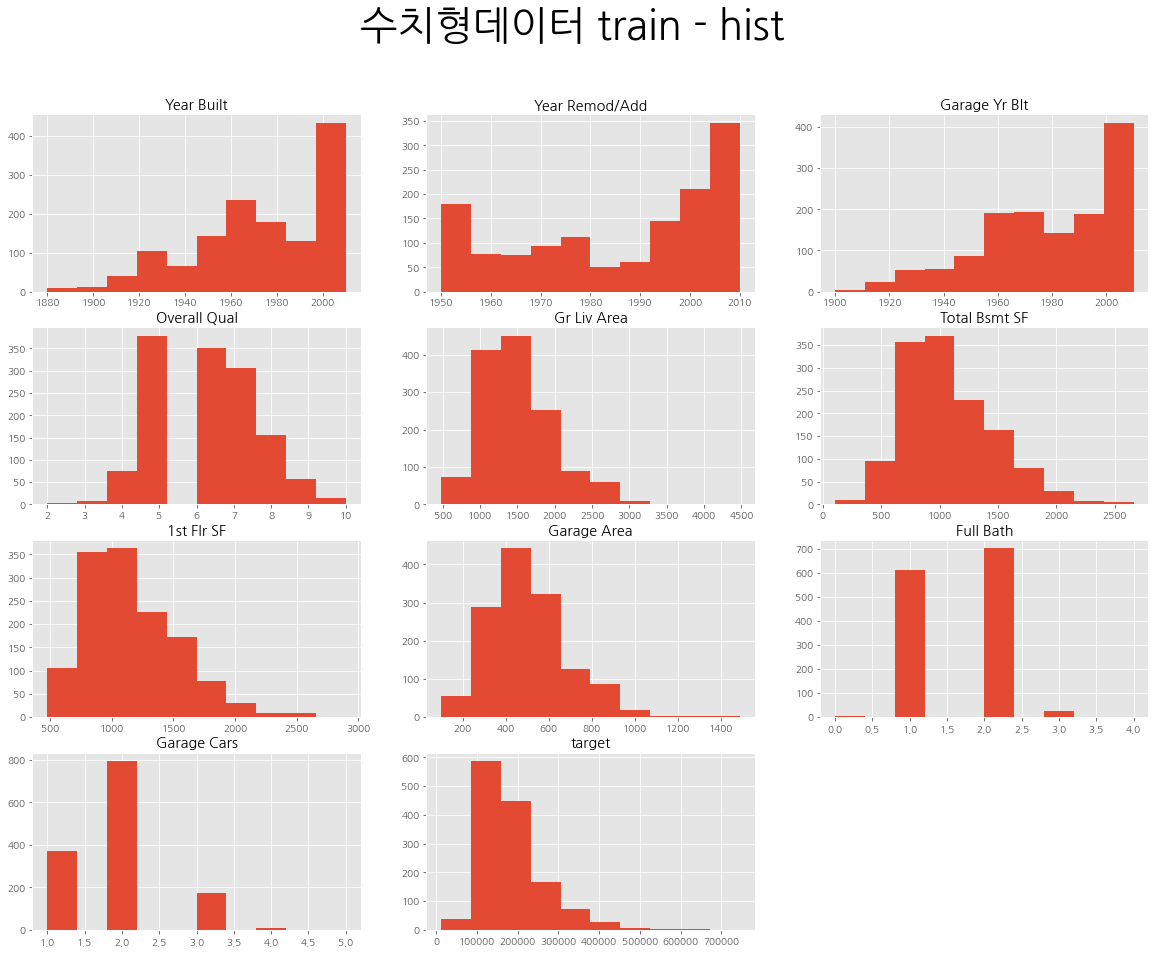

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 train - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(train_df[feature[i]])
plt.show()

In [125]:
train_df["Overall Qual"].value_counts()

5     379
6     351
7     306
8     156
4      75
9      56
10     15
3       8
2       3
Name: Overall Qual, dtype: int64

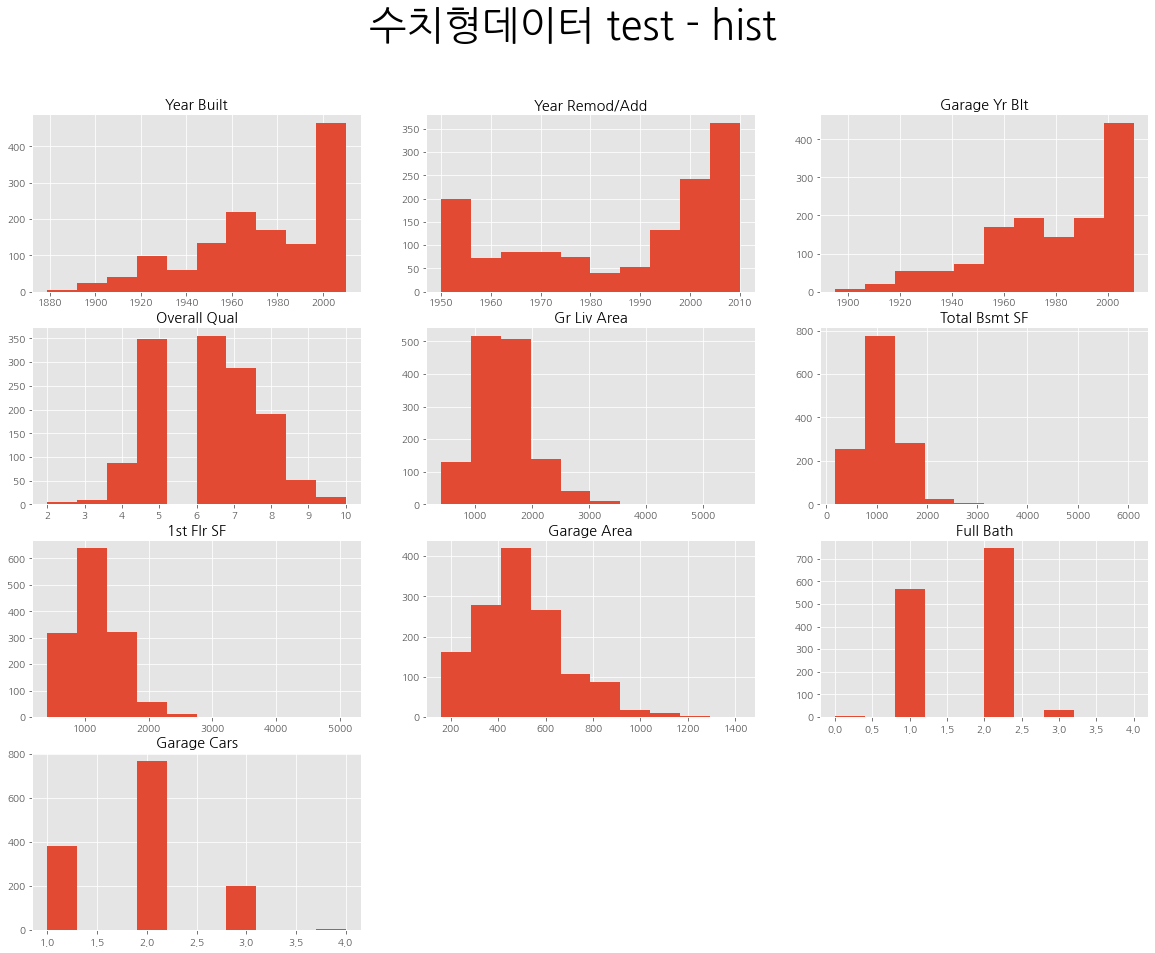

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 test - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(test_df[feature[i]])
plt.show()

## 범주형 데이터는 다음과 같음
- Exter Qual, Kitchen Qual, Bsmt Qual은 범주형변수로, Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!



In [108]:
categorical_features

Index(['Exter Qual', 'Bsmt Qual', 'Kitchen Qual'], dtype='object')

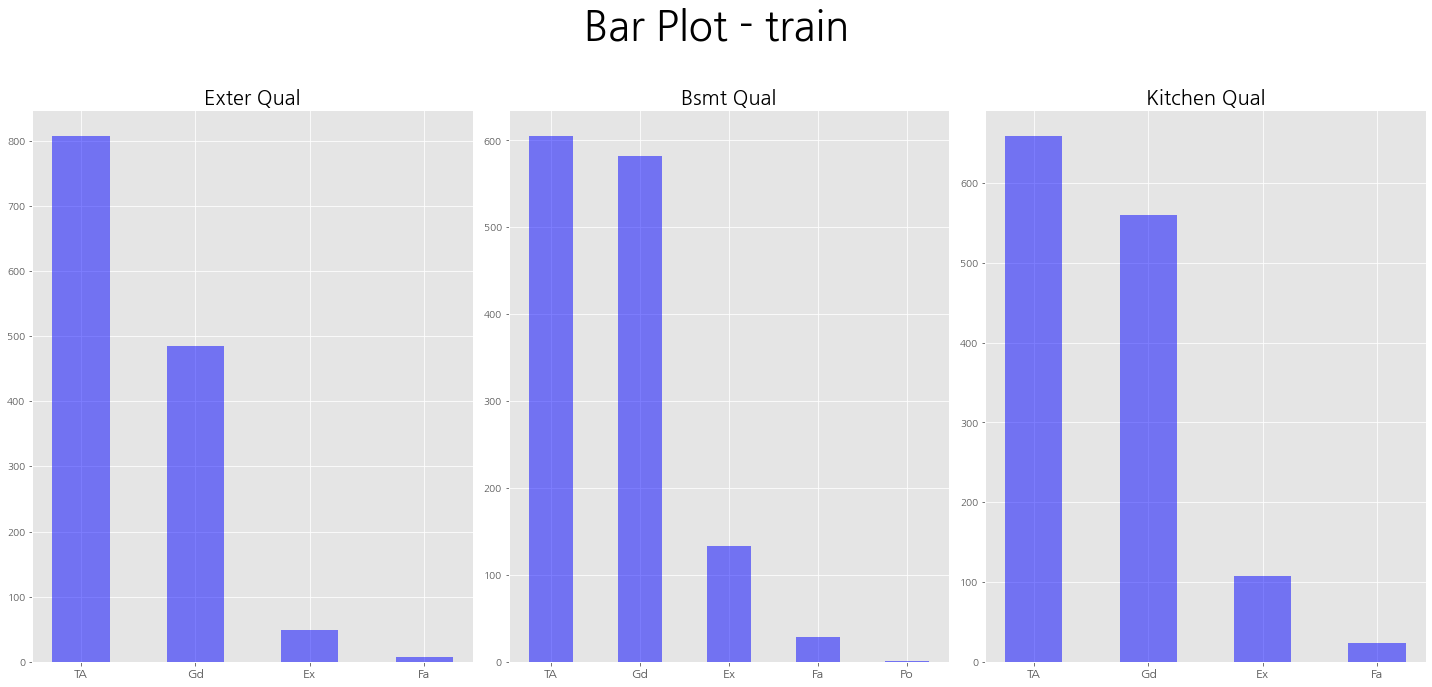

In [109]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

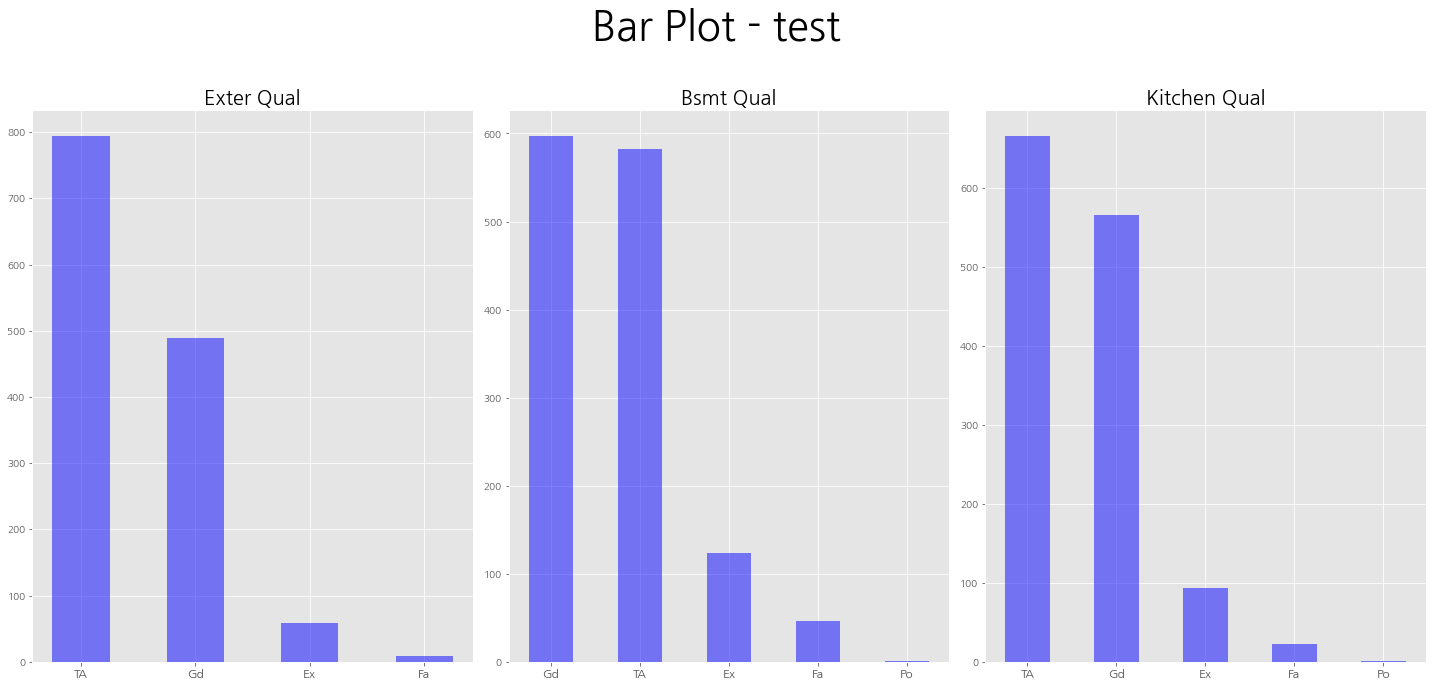

In [110]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 상관관계 시각화

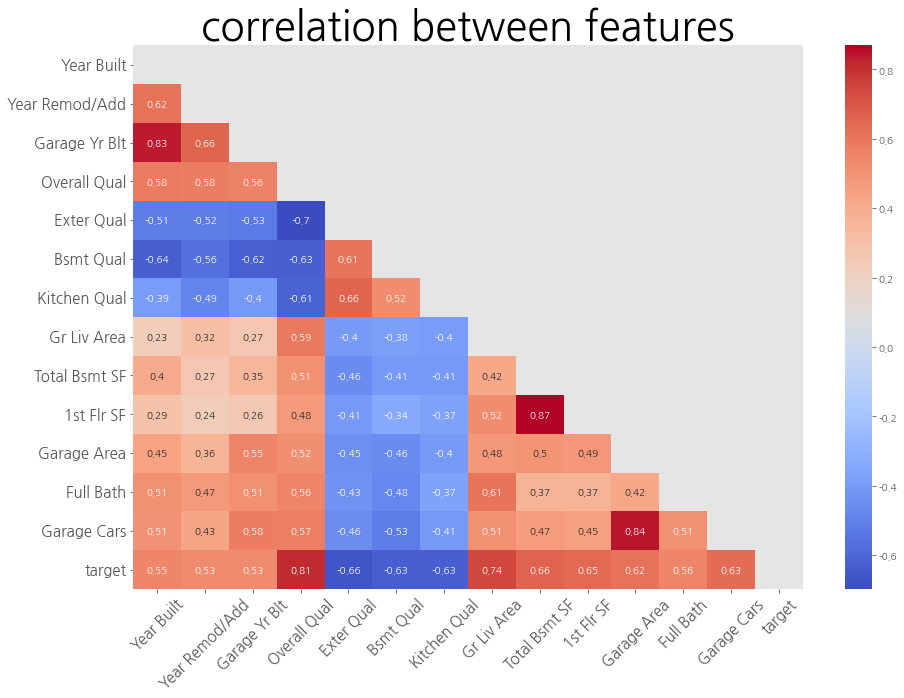

In [111]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

## Target과 다른 feature들과의 관계

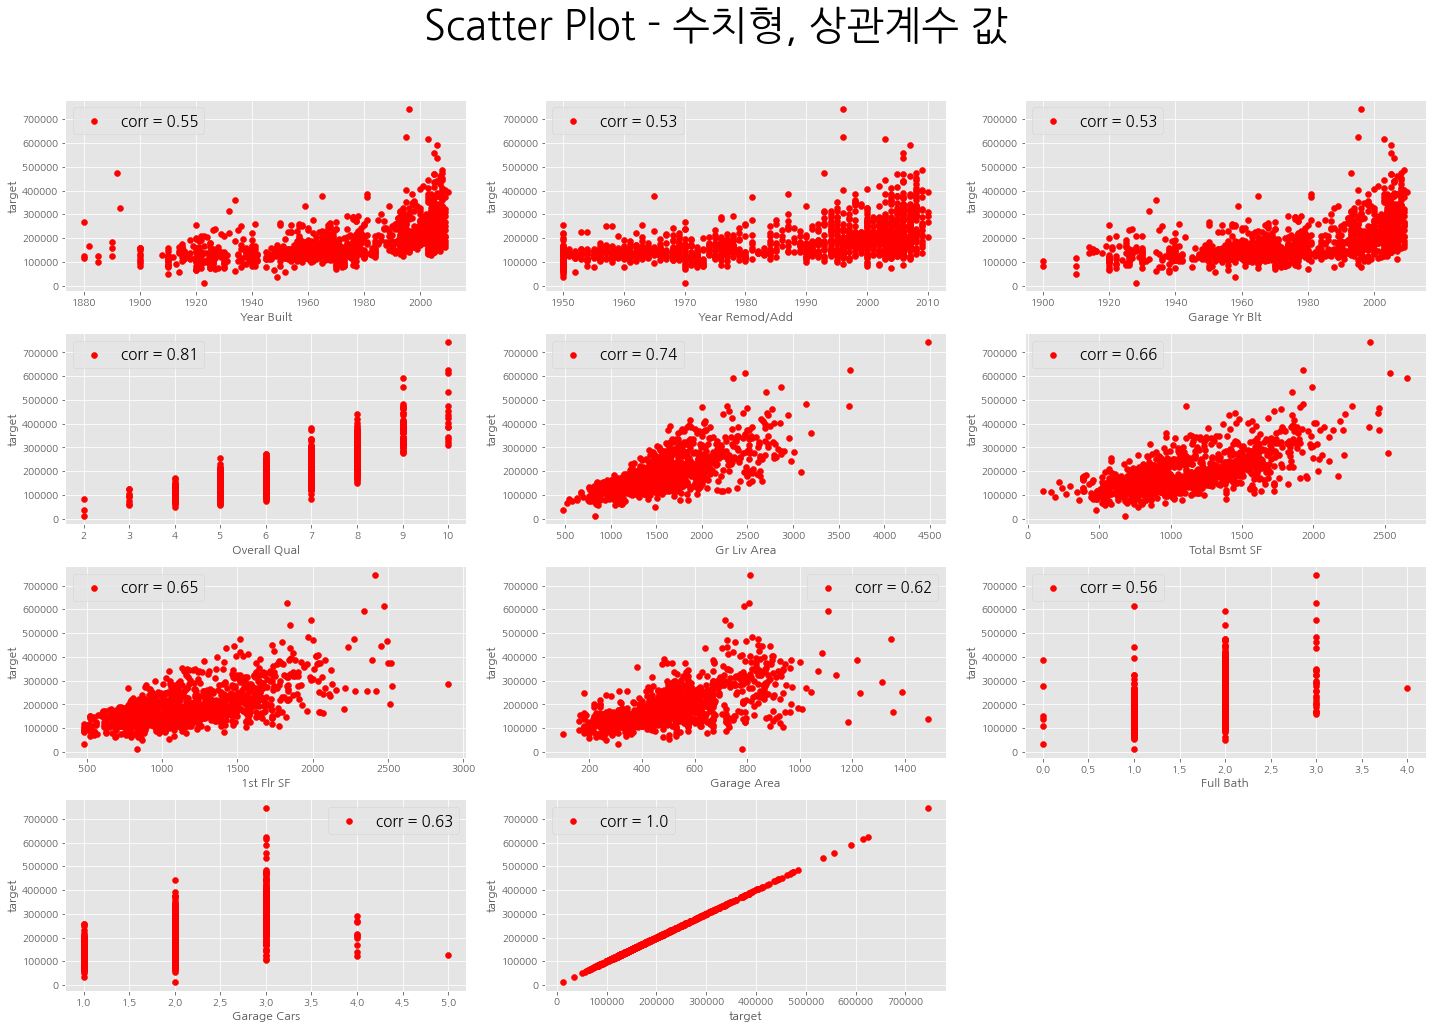

In [112]:
target = "target"

feature = numeric_features

plt.figure(figsize = (20,15))
plt.suptitle("Scatter Plot - 수치형, 상관계수 값",fontsize = 40)

for i in range(len(feature)):
    
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train_df[[feature[i],target]].corr().iloc[0,1].round(2)
    
    c = "red" if corr_score > 0 else "blue"
    
    plt.scatter(train_df[feature[i]], train_df[target], color = c, label = f"corr = {corr_score}")
    plt.legend(fontsize = 15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [219]:
np.log1p(train_df[["Year Built","target"]]).corr()

,Year Built,target
Year Built,1.000000,0.600661
target,0.600661,1.000000


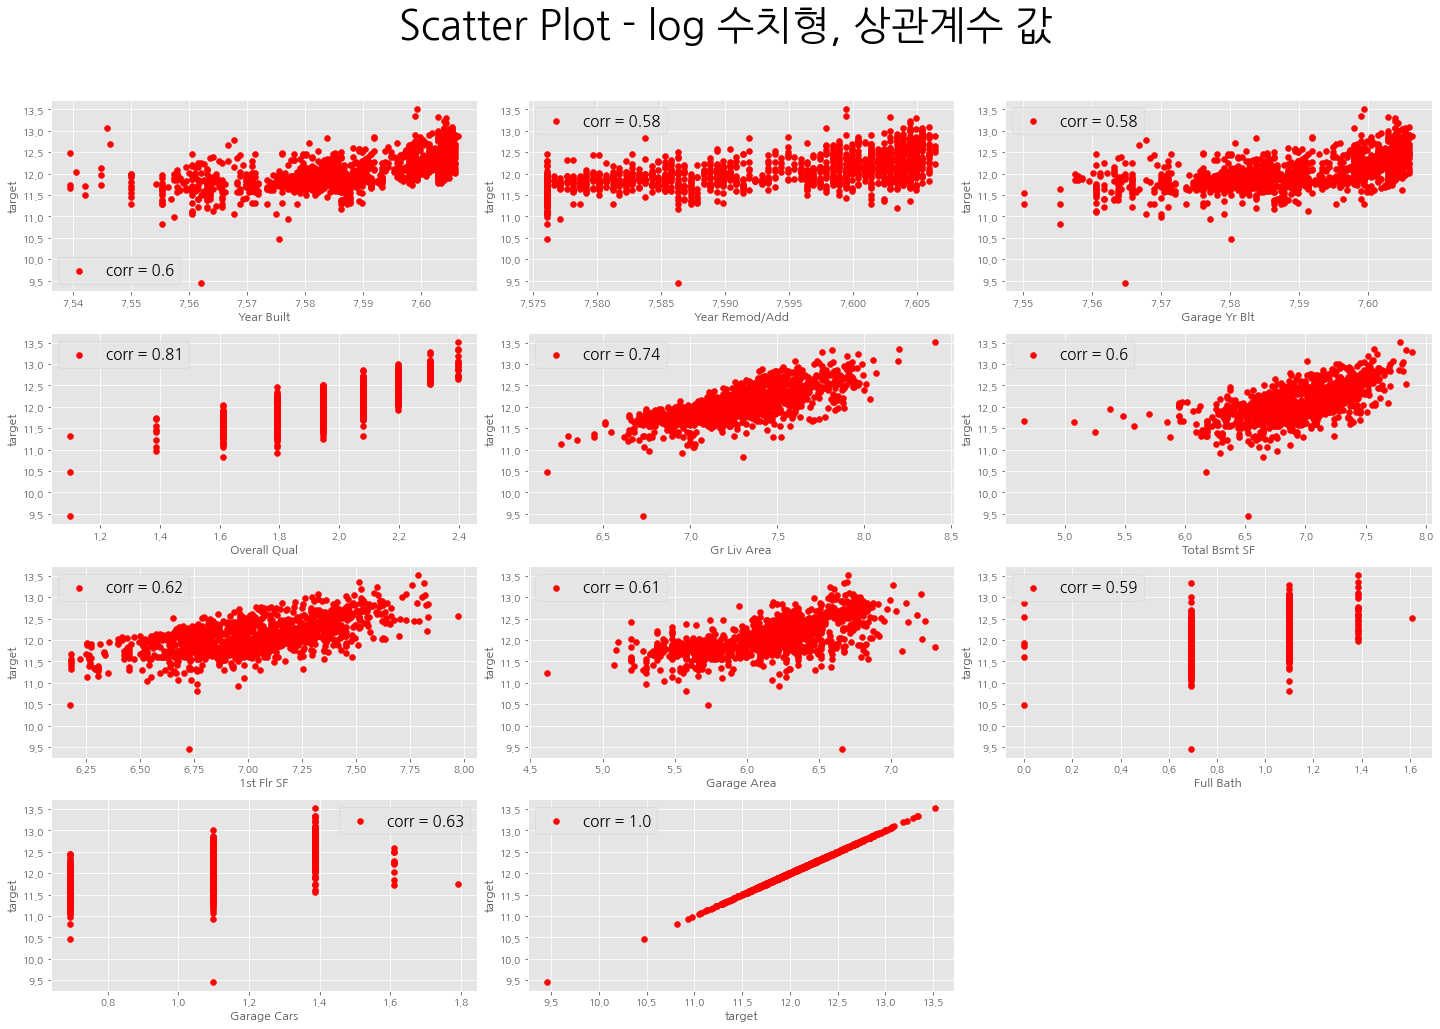

In [218]:
target = "target"

feature = numeric_features

plt.figure(figsize = (20,15))
plt.suptitle("Scatter Plot - log 수치형, 상관계수 값",fontsize = 40)

for i in range(len(feature)):
    
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = np.log1p(train_df[[feature[i],target]]).corr().iloc[0,1].round(2)
    
    c = "red" if corr_score > 0 else "blue"
    
    plt.scatter(np.log1p(train_df[feature[i]]), np.log1p(train_df[target]), color = c, label = f"corr = {corr_score}")
    plt.legend(fontsize = 15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [212]:
# 이상치 개수 구하는 함수 정의

def check_outlier(df,columns):
    
    for column in columns :
        
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        outlier_count = len(df.loc[(df[column] < low) | (df[column] > high)])
        
        
        
        print(f"{column}의 이상치 개수는 {outlier_count} 개 입니다.")
        print(f"이상치는 low : {low} \n high : {high} 입니다. ")
    #return low,high
        
    
    

In [221]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df,numeric_features_del_target)

Year Built의 이상치 개수는 4 개 입니다.
이상치는 low : 1884.5 
 high : 2072.5 입니다. 
Year Remod/Add의 이상치 개수는 0 개 입니다.
이상치는 low : 1914.0 
 high : 2058.0 입니다. 
Garage Yr Blt의 이상치 개수는 0 개 입니다.
이상치는 low : 1899.5 
 high : 2063.5 입니다. 
Overall Qual의 이상치 개수는 0 개 입니다.
이상치는 low : 2.0 
 high : 10.0 입니다. 
Gr Liv Area의 이상치 개수는 28 개 입니다.
이상치는 low : 200.5 
 high : 2716.5 입니다. 
Total Bsmt SF의 이상치 개수는 19 개 입니다.
이상치는 low : 75.0 
 high : 2051.0 입니다. 
1st Flr SF의 이상치 개수는 18 개 입니다.
이상치는 low : 118.0 
 high : 2166.0 입니다. 
Garage Area의 이상치 개수는 36 개 입니다.
이상치는 low : 38.0 
 high : 918.0 입니다. 
Full Bath의 이상치 개수는 1 개 입니다.
이상치는 low : -0.5 
 high : 3.5 입니다. 
Garage Cars의 이상치 개수는 11 개 입니다.
이상치는 low : -0.5 
 high : 3.5 입니다. 


In [220]:
# test 데이터 컬럼별 이상치 개수

check_outlier(test_df,numeric_features_del_target)

Year Built의 이상치 개수는 2 개 입니다.
이상치는 low : 1887.0 
 high : 2071.0 입니다. 
Year Remod/Add의 이상치 개수는 0 개 입니다.
이상치는 low : 1909.0 
 high : 2061.0 입니다. 
Garage Yr Blt의 이상치 개수는 2 개 입니다.
이상치는 low : 1899.5 
 high : 2063.5 입니다. 
Overall Qual의 이상치 개수는 0 개 입니다.
이상치는 low : 2.0 
 high : 10.0 입니다. 
Gr Liv Area의 이상치 개수는 43 개 입니다.
이상치는 low : 311.0 
 high : 2601.0 입니다. 
Total Bsmt SF의 이상치 개수는 22 개 입니다.
이상치는 low : 55.0 
 high : 2109.0 입니다. 
1st Flr SF의 이상치 개수는 21 개 입니다.
이상치는 low : 103.875 
 high : 2192.875 입니다. 
Garage Area의 이상치 개수는 36 개 입니다.
이상치는 low : 45.0 
 high : 899.0 입니다. 
Full Bath의 이상치 개수는 2 개 입니다.
이상치는 low : -0.5 
 high : 3.5 입니다. 
Garage Cars의 이상치 개수는 4 개 입니다.
이상치는 low : -0.5 
 high : 3.5 입니다. 


# EDA 결과

- 결측치는 따로 없음
- 이상치 있는 컬럼들이 꽤 보임. 이들을 어떻게 처리하는지 중요할 듯
    - test에서는 이상치가 확 차이나진 않는 듯
- 수치형 컬럼들이 정규분포를 띄지 않음. 로그로 바꿔주든 표준화하든 해야 할 듯
- 범주형 컬럼들 수치로 어떻게 바구냐에 따라 결과 차이 날 듯

### 일단은 train에서 확 차이나는 이상치 하나 Garage Yr blt만 이상치 처리

In [70]:
train_df.loc[254,"Garage Yr Blt"] = 2007

### 수치형 데이터 전처리
    - 연도변수
        * Year Built : 완공 연도
        * YearRemodAdd : 리모델링 연도
        * GarageYrBlt : 차고 완공 연도

In [205]:
train_pre = train_df.copy().reset_index(drop= True)
test_pre = test_df.copy().reset_index(drop = True)

In [206]:
train_pre.loc[train_pre[train_pre["Year Built"] <1900].index,"Year Built"] = 1900
test_pre.loc[test_pre[test_pre["Year Built"] <1900].index,"Year Built"] = 1900

In [207]:
train_pre.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000
3,1900,2006,2000,5,TA,TA,Gd,1174,680,680,576,1,2,135000
4,2005,2005,2005,7,Gd,Gd,Gd,1958,1026,1026,936,2,3,250000


In [193]:
# for i in range(len(train_pre)):
    
#     if train_pre.loc[i, "Year Remod/Add"] < 2000:
#         train_pre.loc[i, "Year Remod/Add"] = 0
#     else : 
#         train_pre.loc[i, "Year Remod/Add"] = 1

In [182]:
# # 새로운 컬럼 추가

# for i in range(len(train_pre)) :
    
#     if train_pre.loc[i,"Year Built"] < 1910 :
#         train_pre.loc[i,"New_Year Built"] = 1900
        
#     elif train_pre.loc[i,"Year Built"] < 1920 :
#         train_pre.loc[i,"New_Year Built"] = 1910
        
#     elif train_pre.loc[i,"Year Built"] < 1930 :
#         train_pre.loc[i,"New_Year Built"] = 1920

#     elif train_pre.loc[i,"Year Built"] < 1940 :
#         train_pre.loc[i,"New_Year Built"] = 1930

#     elif train_pre.loc[i,"Year Built"] < 1950 :
#         train_pre.loc[i,"New_Year Built"] = 1940

#     elif train_pre.loc[i,"Year Built"] < 1960 :
#         train_pre.loc[i,"New_Year Built"] = 1950

#     elif train_pre.loc[i,"Year Built"] < 1970 :
#         train_pre.loc[i,"New_Year Built"] = 1960

#     elif train_pre.loc[i,"Year Built"] < 1980 :
#         train_pre.loc[i,"New_Year Built"] = 1970

#     elif train_pre.loc[i,"Year Built"] < 1990 :
#         train_pre.loc[i,"New_Year Built"] = 1980

#     elif train_pre.loc[i,"Year Built"] < 2000 :
#         train_pre.loc[i,"New_Year Built"] = 1990
    
#     elif train_pre.loc[i,"Year Built"] <= 2010  :
#         train_pre.loc[i,"New_Year Built"] = 2000

In [198]:
np.log1p(train_pre[numeric_features]).corr()["target"]

Year Built        0.606795
Year Remod/Add    0.450126
Garage Yr Blt     0.575141
Overall Qual      0.814574
Gr Liv Area       0.740647
Total Bsmt SF     0.601016
1st Flr SF        0.623795
Garage Area       0.608130
Full Bath         0.590733
Garage Cars       0.633412
target            1.000000
Name: target, dtype: float64

In [194]:
train_pre.corr()["target"]

Year Built        0.551230
Year Remod/Add    0.431600
Garage Yr Blt     0.527492
Overall Qual      0.810585
Gr Liv Area       0.742197
Total Bsmt SF     0.664161
1st Flr SF        0.647111
Garage Area       0.616734
Full Bath         0.555249
Garage Cars       0.634708
target            1.000000
Name: target, dtype: float64

In [136]:
train_pre[["Year Built", "Year Remod/Add", "Garage Yr Blt"]].describeibe()

,Year Built,Year Remod/Add,Garage Yr Blt
count,1349.000000,1349.000000,1349.000000
mean,1972.967383,1985.088213,1978.307635
std,29.308886,20.156629,24.616545
min,1880.000000,1950.000000,1900.000000
25%,1955.000000,1968.000000,1961.000000
50%,1976.000000,1993.000000,1978.000000
75%,2002.000000,2004.000000,2002.000000
max,2010.000000,2010.000000,2010.000000


In [71]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df, numeric_features)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 28 개 입니다.
Garage Cars의 이상치 개수는 11 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 19 개 입니다.
1st Flr SF의 이상치 개수는 18 개 입니다.
Full Bath의 이상치 개수는 1 개 입니다.
Year Built의 이상치 개수는 4 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 0 개 입니다.
target의 이상치 개수는 66 개 입니다.


### 범주형 컬럼들 수치로 바꿔주기1

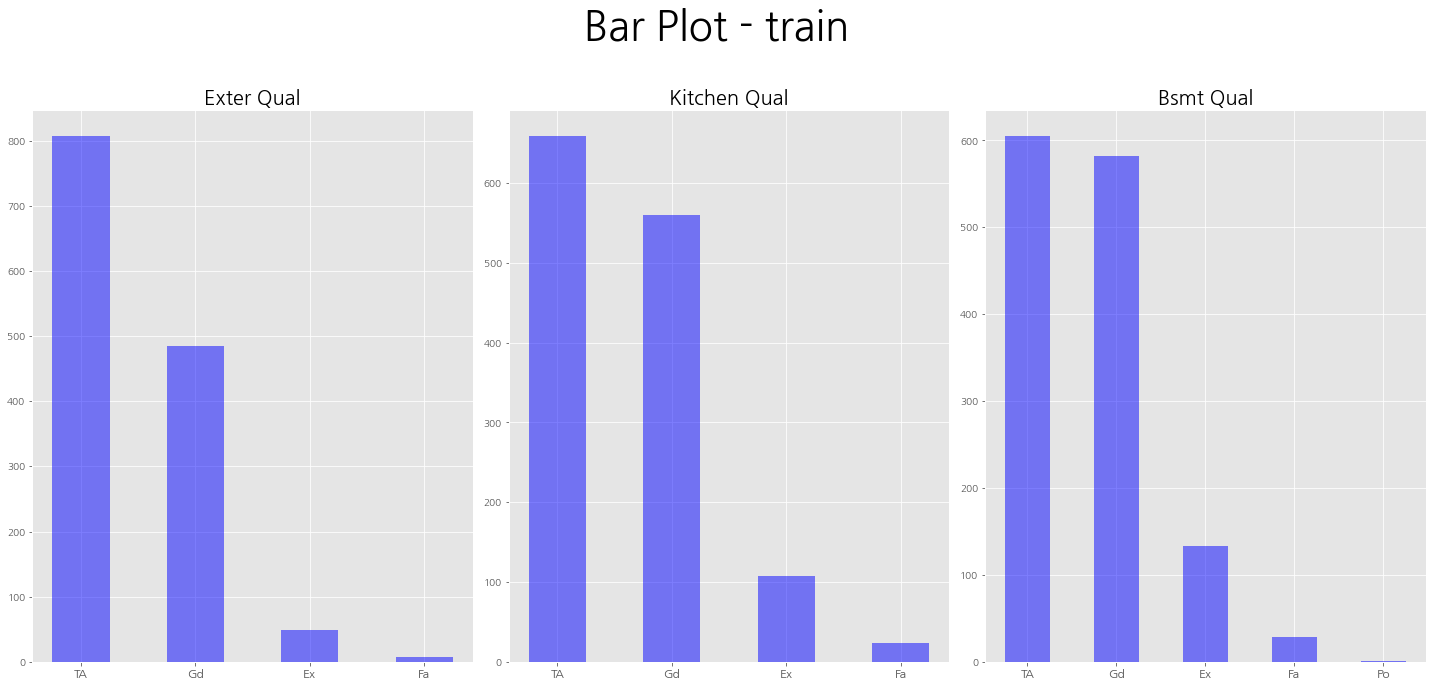

In [72]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

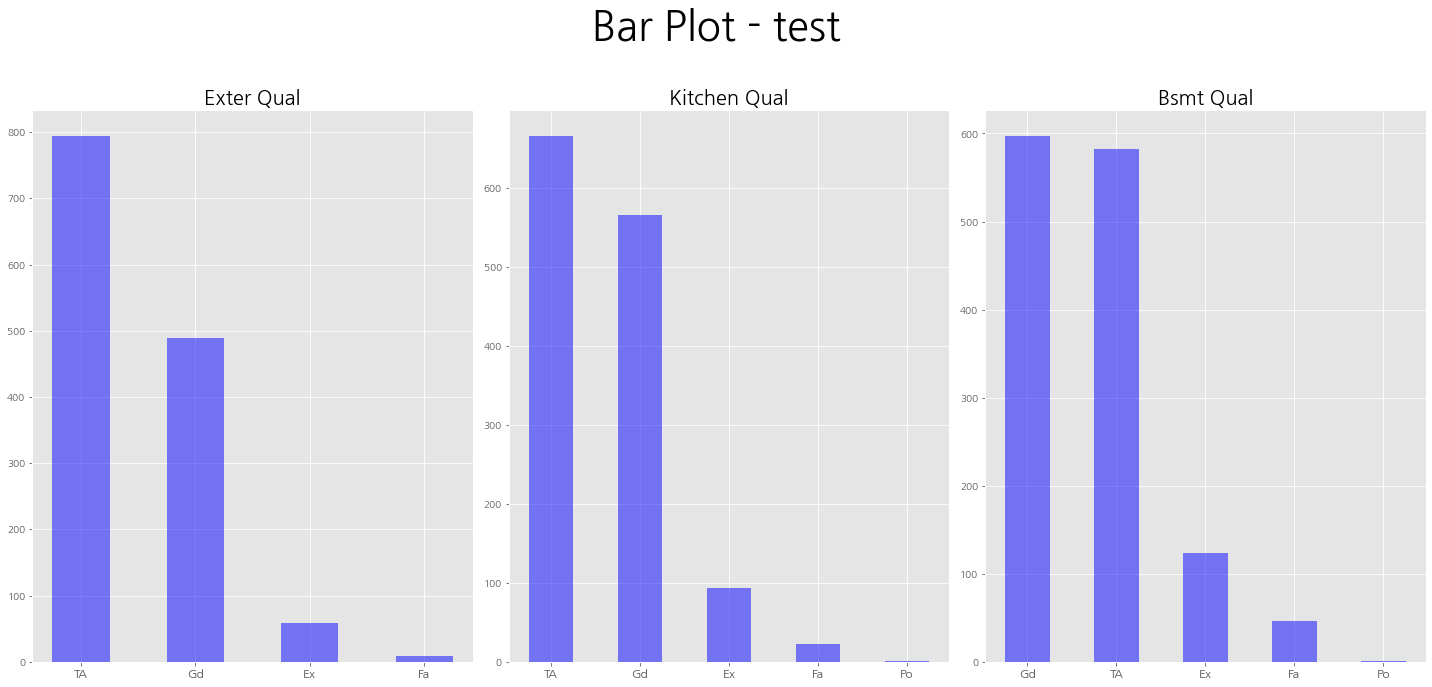

In [73]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [74]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!

train_pre = train_df.copy()
test_pre = test_df.copy()

In [75]:
# "TA","Gd","Ex","Fa","Po"

Exter_Qual_dict = train_df.groupby(["Exter Qual"])["target"].mean().to_dict()
Kitchen_Qual_dict = train_df.groupby(["Kitchen Qual"])["target"].mean().to_dict()
Bsmt_Qual_dict = train_df.groupby(["Bsmt Qual"])["target"].mean().to_dict()

In [76]:
train_pre["Exter Qual"] = train_pre["Exter Qual"].map(Exter_Qual_dict)
train_pre["Kitchen Qual"] = train_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
train_pre["Bsmt Qual"] = train_pre["Bsmt Qual"].map(Bsmt_Qual_dict)

test_pre["Exter Qual"] = test_pre["Exter Qual"].map(Exter_Qual_dict)
test_pre["Kitchen Qual"] = test_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
test_pre["Bsmt Qual"] = test_pre["Bsmt Qual"].map(Bsmt_Qual_dict)

In [77]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   int64  
 1   Year Remod/Add  1349 non-null   int64  
 2   Garage Yr Blt   1349 non-null   int64  
 3   Overall Qual    1349 non-null   int64  
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   int64  
 12  Garage Cars     1349 non-null   int64  
 13  target          1349 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 190.4 KB


In [78]:
test_pre.fillna(test_pre.mean(),inplace = True)

In [79]:
train_pre.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,369636.122449,330963.872180,330451.149533,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,234161.577320,330963.872180,211360.892857,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,147382.582404,143175.100826,144056.610015,900,864,900,288,1,1,123000
3,1900,2006,2000,5,147382.582404,143175.100826,211360.892857,1174,680,680,576,1,2,135000
4,2005,2005,2005,7,234161.577320,201927.286942,211360.892857,1958,1026,1026,936,2,3,250000


In [80]:
train_df.groupby(["Overall Qual"])["target"].mean().to_dict()

{2: 43366.666666666664,
 3: 92334.375,
 4: 108232.73333333334,
 5: 136439.7810026385,
 6: 163546.35897435897,
 7: 206188.26797385621,
 8: 273767.0961538461,
 9: 369155.8035714286,
 10: 453556.06666666665}

In [81]:
Overall_Qual_list = train_df.groupby(["Overall Qual"])["target"].mean().to_dict()
Full_Bath_dict = train_df.groupby(["Full Bath"])["target"].mean().to_dict()
Garage_Cars_dict = train_df.groupby(["Garage Cars"])["target"].mean().to_dict()


In [82]:
train_pre["Full Bath"] = train_pre["Full Bath"].map(Full_Bath_dict)
train_pre["Garage Cars"] = train_pre["Garage Cars"].map(Garage_Cars_dict)
train_pre["Overall Qual"] = train_pre["Overall Qual"].map(Overall_Qual_list)

test_pre["Full Bath"] = test_pre["Full Bath"].map(Full_Bath_dict)
test_pre["Garage Cars"] = test_pre["Garage Cars"].map(Garage_Cars_dict)
test_pre["Overall Qual"] = test_pre["Overall Qual"].map(Overall_Qual_list)


In [83]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   int64  
 1   Year Remod/Add  1349 non-null   int64  
 2   Garage Yr Blt   1349 non-null   int64  
 3   Overall Qual    1349 non-null   float64
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   float64
 12  Garage Cars     1349 non-null   float64
 13  target          1349 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 190.4 KB


In [84]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1350 non-null   int64  
 1   Year Remod/Add  1350 non-null   int64  
 2   Garage Yr Blt   1350 non-null   int64  
 3   Overall Qual    1350 non-null   float64
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   float64
 12  Garage Cars     1350 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 137.2 KB


In [85]:
train_pre = np.log1p(train_pre)
test_pre = np.log1p(test_pre)


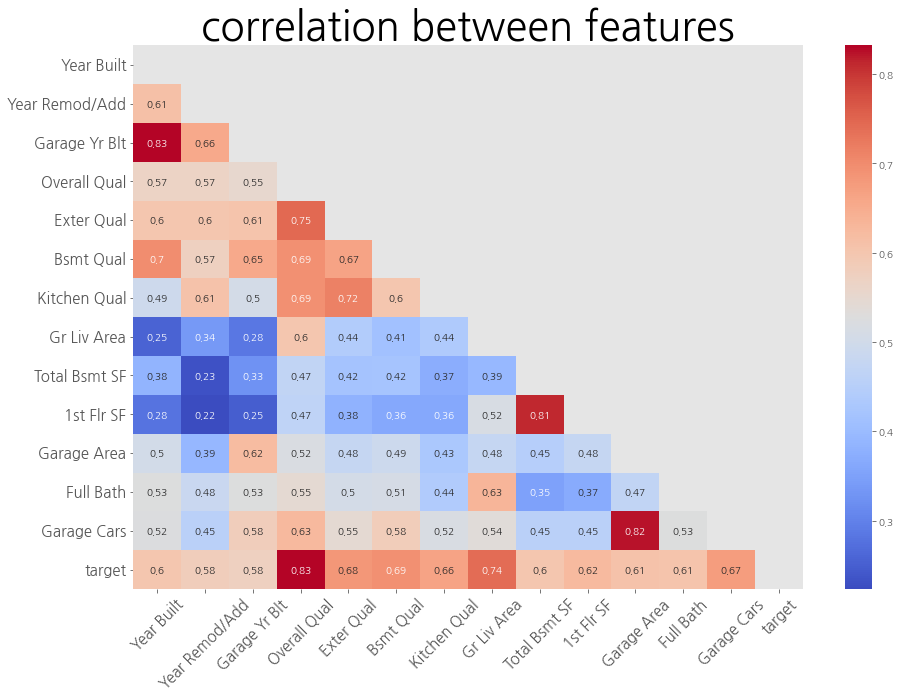

In [86]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_pre.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도 - 로그 변환 후 
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [87]:
# #상관관계 분석도 - 로그 변환 전
# plt.figure(figsize=(15,10))

# heat_table = corr_df.corr()
# mask = np.zeros_like(heat_table)
# mask[np.triu_indices_from(mask)] = True
# heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
# heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
# heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
# plt.title('correlation between features', fontsize=40)
# plt.show()

In [88]:
train_pre.corr()["target"].sort_values(ascending=False)

target            1.000000
Overall Qual      0.832208
Gr Liv Area       0.740647
Bsmt Qual         0.692802
Exter Qual        0.683882
Garage Cars       0.674463
Kitchen Qual      0.664929
1st Flr SF        0.623795
Garage Area       0.608130
Full Bath         0.605984
Total Bsmt SF     0.601016
Year Built        0.600661
Year Remod/Add    0.580732
Garage Yr Blt     0.575141
Name: target, dtype: float64

In [89]:
# 새로운 컬럼 추가해보기

train_pre_new = train_pre.copy()
train_pre_new['Year Gap Remod'] = train_pre_new['Year Remod/Add'] - train_pre_new['Year Built']
train_pre_new['Car Area'] = train_pre_new['Garage Area']/train_pre_new['Garage Cars']
train_pre_new['2nd flr SF'] = train_pre_new['Gr Liv Area'] - train_pre_new['1st Flr SF']
train_pre_new['2nd flr'] = train_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
train_pre_new['Total SF'] = train_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
train_pre_new['Sum Qual'] = train_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
train_pre_new['Garage InOut'] = train_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

test_pre_new = test_pre.copy()
test_pre_new['Year Gap Remod'] = test_pre_new['Year Remod/Add'] - test_pre_new['Year Built']
test_pre_new['Car Area'] = test_pre_new['Garage Area']/test_pre_new['Garage Cars']
test_pre_new['2nd flr SF'] = test_pre_new['Gr Liv Area'] - test_pre_new['1st Flr SF']
test_pre_new['2nd flr'] = test_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
test_pre_new['Total SF'] = test_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
test_pre_new['Sum Qual'] = test_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
test_pre_new['Garage InOut'] = test_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

In [90]:
train_pre_new

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,...,Full Bath,Garage Cars,target,Year Gap Remod,Car Area,2nd flr SF,2nd flr,Total SF,Sum Qual,Garage InOut
0,7.602900,7.602900,7.602900,13.024876,12.820277,12.709768,12.708217,7.780303,7.780303,7.780303,...,12.308374,12.659551,12.864243,0.000000,0.543168,0.000000,0,22.436871,38.553371,0
1,7.604396,7.604894,7.604396,12.236550,12.363771,12.709768,12.261327,7.210080,7.210080,7.210080,...,12.308374,12.128708,12.175619,0.000498,0.506759,0.000000,0,20.566489,36.861648,0
2,7.584773,7.584773,7.584773,11.823646,11.900794,11.871831,11.877969,6.803505,6.762730,6.803505,...,11.849138,11.768855,11.719948,0.000000,0.481476,0.000000,0,19.232661,35.602408,0
3,7.550135,7.604396,7.601402,11.823646,11.900794,11.871831,12.261327,7.069023,6.523562,6.523562,...,11.849138,12.128708,11.813037,0.054261,0.524198,0.545461,1,19.950428,35.985767,1
4,7.603898,7.603898,7.603898,12.236550,12.363771,12.215668,12.261327,7.580189,6.934397,6.934397,...,12.308374,12.659551,12.429220,0.000000,0.540515,0.645792,1,21.357270,36.861648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,7.599401,7.599902,7.599401,12.004858,12.363771,12.709768,11.877969,7.471363,6.771936,6.790097,...,12.308374,12.128708,12.225880,0.000501,0.498600,0.681266,1,20.290671,36.246597,1
1346,7.604396,7.604396,7.604396,12.818977,12.363771,12.709768,12.708217,7.918992,7.523481,7.523481,...,12.308374,12.659551,12.873905,0.000000,0.532911,0.395511,1,22.188886,37.890965,1
1347,7.584773,7.584773,7.584773,11.823646,11.900794,11.871831,11.877969,7.102499,7.102499,7.102499,...,12.308374,11.768855,11.870607,0.000000,0.489868,0.000000,0,19.970190,35.602408,0
1348,7.588324,7.588324,7.588324,11.823646,11.900794,12.215668,11.877969,6.796824,6.762730,6.796824,...,11.849138,12.128708,11.782960,0.000000,0.502036,0.000000,0,19.648598,35.602408,0


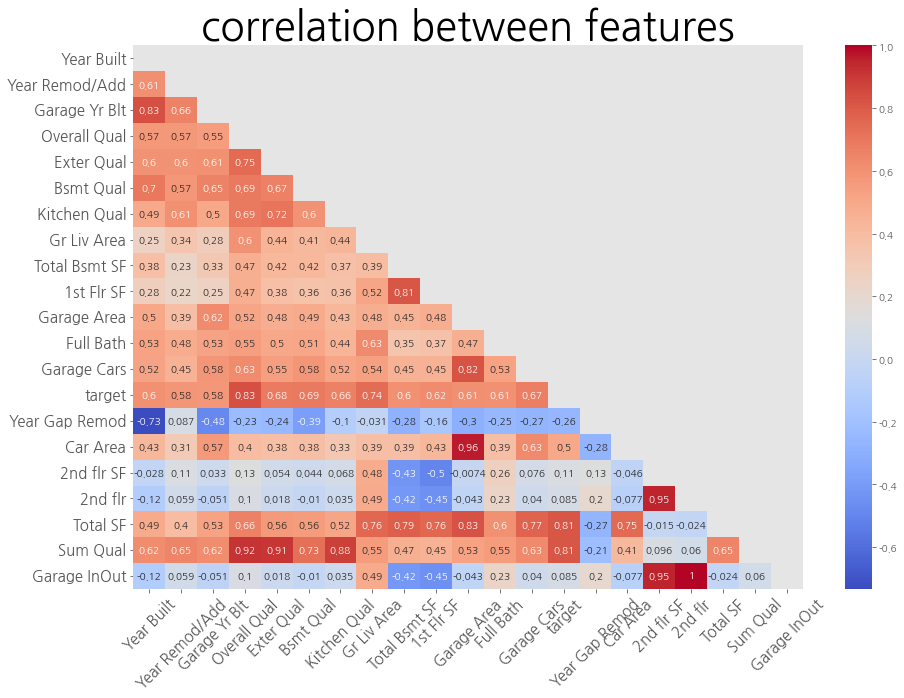

In [91]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_pre_new.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도 - 로그 변환 후 
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [92]:
train_pre_new.columns

Index(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual',
       'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area',
       'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath',
       'Garage Cars', 'target', 'Year Gap Remod', 'Car Area', '2nd flr SF',
       '2nd flr', 'Total SF', 'Sum Qual', 'Garage InOut'],
      dtype='object')

In [93]:
# 상관계수 값 0.25이하인건 drop
# drop할 컬럼 : 2nd flr SF, 2nd flr, Garage InOut

In [94]:
train_pre_new.drop(columns=["2nd flr SF","2nd flr","Garage InOut"], axis = 1, inplace = True)
test_pre_new.drop(columns=["2nd flr SF","2nd flr","Garage InOut"], axis = 1, inplace = True)

In [95]:
train_pre_new.shape

(1349, 18)

In [96]:
test_pre_new.shape

(1350, 17)

In [97]:
train_df

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000
3,1900,2006,2000,5,TA,TA,Gd,1174,680,680,576,1,2,135000
4,2005,2005,2005,7,Gd,Gd,Gd,1958,1026,1026,936,2,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1996,1997,1996,6,Gd,Ex,TA,1756,872,888,422,2,2,204000
1346,2006,2006,2006,9,Gd,Ex,Ex,2748,1850,1850,850,2,3,390000
1347,1967,1967,1967,5,TA,TA,TA,1214,1214,1214,318,2,1,143000
1348,1974,1974,1974,5,TA,Gd,TA,894,864,894,440,1,2,131000


In [98]:
# train_pre_drop = train_pre.copy()
# train_pre_drop = train_pre_drop.drop(columns=["Year Built","Year Remod/Add","Garage Yr Blt"])

# test_pre_drop = test_pre.copy()
# test_pre_drop = test_pre_drop.drop(columns=["Year Built","Year Remod/Add","Garage Yr Blt"])

# 모델링

In [99]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [100]:
ridge = Ridge()
lasso = Lasso()
linear = LinearRegression()
cat_reg = CatBoostRegressor()
ngb_reg = NGBRegressor()
gb_reg = GradientBoostingRegressor()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [71]:
# 평가 기준 정의
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [72]:
#nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [63]:
# X_data = train_pre.drop(columns=["target"], axis = 1)
# y_target = train_pre["target"]

In [64]:
X_data = train_pre_new.drop(columns=["target"], axis = 1)
y_target = train_pre_new["target"]

In [65]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [66]:
models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]

get_avg_NAME_cv(models)


Ridge CV 평균 NMAE 값 : 0.009

Lasso CV 평균 NMAE 값 : 0.025

LinearRegression CV 평균 NMAE 값 : 0.009
Learning rate set to 0.041438
0:	learn: 0.3761167	total: 151ms	remaining: 2m 31s
1:	learn: 0.3657247	total: 156ms	remaining: 1m 17s
2:	learn: 0.3561254	total: 159ms	remaining: 52.7s
3:	learn: 0.3467049	total: 162ms	remaining: 40.4s
4:	learn: 0.3380171	total: 165ms	remaining: 32.9s
5:	learn: 0.3295102	total: 168ms	remaining: 27.8s
6:	learn: 0.3215535	total: 170ms	remaining: 24.2s
7:	learn: 0.3136082	total: 173ms	remaining: 21.4s
8:	learn: 0.3065508	total: 175ms	remaining: 19.3s
9:	learn: 0.2997061	total: 177ms	remaining: 17.5s
10:	learn: 0.2927034	total: 178ms	remaining: 16s
11:	learn: 0.2863560	total: 180ms	remaining: 14.8s
12:	learn: 0.2803494	total: 182ms	remaining: 13.8s
13:	learn: 0.2744014	total: 183ms	remaining: 12.9s
14:	learn: 0.2687520	total: 185ms	remaining: 12.1s
15:	learn: 0.2626925	total: 186ms	remaining: 11.4s
16:	learn: 0.2573756	total: 187ms	remaining: 10.8s
17:	learn: 0.25228

235:	learn: 0.1042273	total: 486ms	remaining: 1.57s
236:	learn: 0.1040631	total: 487ms	remaining: 1.57s
237:	learn: 0.1039907	total: 488ms	remaining: 1.56s
238:	learn: 0.1039103	total: 489ms	remaining: 1.56s
239:	learn: 0.1037179	total: 491ms	remaining: 1.55s
240:	learn: 0.1035681	total: 492ms	remaining: 1.55s
241:	learn: 0.1034747	total: 494ms	remaining: 1.55s
242:	learn: 0.1033759	total: 495ms	remaining: 1.54s
243:	learn: 0.1033315	total: 497ms	remaining: 1.54s
244:	learn: 0.1032537	total: 498ms	remaining: 1.53s
245:	learn: 0.1031625	total: 499ms	remaining: 1.53s
246:	learn: 0.1030275	total: 501ms	remaining: 1.53s
247:	learn: 0.1028061	total: 503ms	remaining: 1.52s
248:	learn: 0.1026742	total: 504ms	remaining: 1.52s
249:	learn: 0.1026375	total: 506ms	remaining: 1.52s
250:	learn: 0.1024616	total: 507ms	remaining: 1.51s
251:	learn: 0.1023881	total: 509ms	remaining: 1.51s
252:	learn: 0.1022436	total: 510ms	remaining: 1.5s
253:	learn: 0.1021421	total: 511ms	remaining: 1.5s
254:	learn: 0.

493:	learn: 0.0839507	total: 829ms	remaining: 849ms
494:	learn: 0.0839392	total: 830ms	remaining: 847ms
495:	learn: 0.0838812	total: 832ms	remaining: 845ms
496:	learn: 0.0838071	total: 833ms	remaining: 843ms
497:	learn: 0.0837139	total: 835ms	remaining: 841ms
498:	learn: 0.0836595	total: 836ms	remaining: 840ms
499:	learn: 0.0836534	total: 838ms	remaining: 838ms
500:	learn: 0.0836480	total: 839ms	remaining: 836ms
501:	learn: 0.0835076	total: 841ms	remaining: 835ms
502:	learn: 0.0834947	total: 843ms	remaining: 833ms
503:	learn: 0.0833819	total: 845ms	remaining: 831ms
504:	learn: 0.0832382	total: 846ms	remaining: 829ms
505:	learn: 0.0830834	total: 847ms	remaining: 827ms
506:	learn: 0.0829595	total: 848ms	remaining: 825ms
507:	learn: 0.0828845	total: 850ms	remaining: 823ms
508:	learn: 0.0827053	total: 851ms	remaining: 821ms
509:	learn: 0.0825410	total: 853ms	remaining: 819ms
510:	learn: 0.0823864	total: 854ms	remaining: 817ms
511:	learn: 0.0823050	total: 855ms	remaining: 815ms
512:	learn: 

717:	learn: 0.0695089	total: 1.17s	remaining: 460ms
718:	learn: 0.0694932	total: 1.17s	remaining: 459ms
719:	learn: 0.0694728	total: 1.17s	remaining: 457ms
720:	learn: 0.0694508	total: 1.18s	remaining: 455ms
721:	learn: 0.0693948	total: 1.18s	remaining: 453ms
722:	learn: 0.0693670	total: 1.18s	remaining: 452ms
723:	learn: 0.0693589	total: 1.18s	remaining: 450ms
724:	learn: 0.0692988	total: 1.18s	remaining: 448ms
725:	learn: 0.0692687	total: 1.18s	remaining: 447ms
726:	learn: 0.0692079	total: 1.18s	remaining: 445ms
727:	learn: 0.0691715	total: 1.19s	remaining: 443ms
728:	learn: 0.0691596	total: 1.2s	remaining: 445ms
729:	learn: 0.0690800	total: 1.2s	remaining: 444ms
730:	learn: 0.0690045	total: 1.2s	remaining: 443ms
731:	learn: 0.0689369	total: 1.21s	remaining: 441ms
732:	learn: 0.0689167	total: 1.21s	remaining: 440ms
733:	learn: 0.0688767	total: 1.21s	remaining: 438ms
734:	learn: 0.0687861	total: 1.21s	remaining: 436ms
735:	learn: 0.0687610	total: 1.21s	remaining: 435ms
736:	learn: 0.0

958:	learn: 0.0580847	total: 1.52s	remaining: 64.9ms
959:	learn: 0.0580459	total: 1.52s	remaining: 63.3ms
960:	learn: 0.0579671	total: 1.52s	remaining: 61.7ms
961:	learn: 0.0579034	total: 1.52s	remaining: 60.1ms
962:	learn: 0.0578787	total: 1.52s	remaining: 58.5ms
963:	learn: 0.0578371	total: 1.52s	remaining: 56.9ms
964:	learn: 0.0577711	total: 1.53s	remaining: 55.4ms
965:	learn: 0.0577245	total: 1.53s	remaining: 53.8ms
966:	learn: 0.0577120	total: 1.54s	remaining: 52.7ms
967:	learn: 0.0576575	total: 1.55s	remaining: 51.1ms
968:	learn: 0.0576397	total: 1.55s	remaining: 49.5ms
969:	learn: 0.0576300	total: 1.55s	remaining: 47.9ms
970:	learn: 0.0575735	total: 1.55s	remaining: 46.3ms
971:	learn: 0.0574866	total: 1.55s	remaining: 44.7ms
972:	learn: 0.0574776	total: 1.55s	remaining: 43.1ms
973:	learn: 0.0574576	total: 1.55s	remaining: 41.5ms
974:	learn: 0.0574313	total: 1.56s	remaining: 39.9ms
975:	learn: 0.0573874	total: 1.56s	remaining: 38.3ms
976:	learn: 0.0573565	total: 1.56s	remaining: 

172:	learn: 0.1150640	total: 231ms	remaining: 1.1s
173:	learn: 0.1149724	total: 233ms	remaining: 1.1s
174:	learn: 0.1148738	total: 234ms	remaining: 1.1s
175:	learn: 0.1147529	total: 235ms	remaining: 1.1s
176:	learn: 0.1144702	total: 237ms	remaining: 1.1s
177:	learn: 0.1143136	total: 238ms	remaining: 1.1s
178:	learn: 0.1141506	total: 239ms	remaining: 1.1s
179:	learn: 0.1140913	total: 241ms	remaining: 1.1s
180:	learn: 0.1139184	total: 242ms	remaining: 1.09s
181:	learn: 0.1138174	total: 243ms	remaining: 1.09s
182:	learn: 0.1136507	total: 245ms	remaining: 1.09s
183:	learn: 0.1134122	total: 246ms	remaining: 1.09s
184:	learn: 0.1133228	total: 248ms	remaining: 1.09s
185:	learn: 0.1131970	total: 250ms	remaining: 1.09s
186:	learn: 0.1129884	total: 251ms	remaining: 1.09s
187:	learn: 0.1128596	total: 252ms	remaining: 1.09s
188:	learn: 0.1127137	total: 254ms	remaining: 1.09s
189:	learn: 0.1125112	total: 255ms	remaining: 1.09s
190:	learn: 0.1123481	total: 256ms	remaining: 1.08s
191:	learn: 0.112184

425:	learn: 0.0879452	total: 576ms	remaining: 776ms
426:	learn: 0.0878623	total: 577ms	remaining: 775ms
427:	learn: 0.0878186	total: 579ms	remaining: 774ms
428:	learn: 0.0876493	total: 580ms	remaining: 773ms
429:	learn: 0.0875994	total: 582ms	remaining: 771ms
430:	learn: 0.0875371	total: 583ms	remaining: 770ms
431:	learn: 0.0873902	total: 585ms	remaining: 769ms
432:	learn: 0.0873575	total: 586ms	remaining: 767ms
433:	learn: 0.0872903	total: 588ms	remaining: 767ms
434:	learn: 0.0872374	total: 589ms	remaining: 765ms
435:	learn: 0.0871513	total: 591ms	remaining: 764ms
436:	learn: 0.0870844	total: 593ms	remaining: 764ms
437:	learn: 0.0869924	total: 594ms	remaining: 762ms
438:	learn: 0.0869544	total: 595ms	remaining: 761ms
439:	learn: 0.0868546	total: 597ms	remaining: 760ms
440:	learn: 0.0867309	total: 599ms	remaining: 759ms
441:	learn: 0.0865979	total: 600ms	remaining: 758ms
442:	learn: 0.0865552	total: 601ms	remaining: 756ms
443:	learn: 0.0864799	total: 603ms	remaining: 755ms
444:	learn: 

673:	learn: 0.0699966	total: 922ms	remaining: 446ms
674:	learn: 0.0699527	total: 923ms	remaining: 445ms
675:	learn: 0.0698887	total: 925ms	remaining: 443ms
676:	learn: 0.0698653	total: 926ms	remaining: 442ms
677:	learn: 0.0697790	total: 927ms	remaining: 440ms
678:	learn: 0.0697233	total: 929ms	remaining: 439ms
679:	learn: 0.0697011	total: 930ms	remaining: 438ms
680:	learn: 0.0696671	total: 932ms	remaining: 436ms
681:	learn: 0.0696025	total: 933ms	remaining: 435ms
682:	learn: 0.0695218	total: 934ms	remaining: 434ms
683:	learn: 0.0694710	total: 936ms	remaining: 432ms
684:	learn: 0.0694369	total: 938ms	remaining: 431ms
685:	learn: 0.0694045	total: 939ms	remaining: 430ms
686:	learn: 0.0693758	total: 941ms	remaining: 429ms
687:	learn: 0.0693001	total: 942ms	remaining: 427ms
688:	learn: 0.0692677	total: 944ms	remaining: 426ms
689:	learn: 0.0692334	total: 945ms	remaining: 425ms
690:	learn: 0.0692045	total: 947ms	remaining: 423ms
691:	learn: 0.0691664	total: 948ms	remaining: 422ms
692:	learn: 

925:	learn: 0.0587042	total: 1.26s	remaining: 101ms
926:	learn: 0.0586787	total: 1.27s	remaining: 99.8ms
927:	learn: 0.0586697	total: 1.27s	remaining: 98.4ms
928:	learn: 0.0586420	total: 1.27s	remaining: 97.1ms
929:	learn: 0.0585877	total: 1.27s	remaining: 95.7ms
930:	learn: 0.0585606	total: 1.27s	remaining: 94.4ms
931:	learn: 0.0585274	total: 1.27s	remaining: 93ms
932:	learn: 0.0585226	total: 1.27s	remaining: 91.6ms
933:	learn: 0.0584726	total: 1.28s	remaining: 90.3ms
934:	learn: 0.0584655	total: 1.28s	remaining: 88.9ms
935:	learn: 0.0584407	total: 1.28s	remaining: 87.6ms
936:	learn: 0.0584209	total: 1.28s	remaining: 86.2ms
937:	learn: 0.0583853	total: 1.28s	remaining: 84.8ms
938:	learn: 0.0583486	total: 1.28s	remaining: 83.5ms
939:	learn: 0.0582935	total: 1.29s	remaining: 82.1ms
940:	learn: 0.0582614	total: 1.29s	remaining: 80.8ms
941:	learn: 0.0581811	total: 1.29s	remaining: 79.4ms
942:	learn: 0.0581420	total: 1.29s	remaining: 78ms
943:	learn: 0.0581191	total: 1.29s	remaining: 76.6m

150:	learn: 0.1158694	total: 204ms	remaining: 1.15s
151:	learn: 0.1156422	total: 205ms	remaining: 1.15s
152:	learn: 0.1153738	total: 207ms	remaining: 1.14s
153:	learn: 0.1151846	total: 208ms	remaining: 1.14s
154:	learn: 0.1150786	total: 209ms	remaining: 1.14s
155:	learn: 0.1148281	total: 211ms	remaining: 1.14s
156:	learn: 0.1145853	total: 213ms	remaining: 1.14s
157:	learn: 0.1144938	total: 214ms	remaining: 1.14s
158:	learn: 0.1142651	total: 215ms	remaining: 1.14s
159:	learn: 0.1141510	total: 217ms	remaining: 1.14s
160:	learn: 0.1140129	total: 218ms	remaining: 1.14s
161:	learn: 0.1139390	total: 220ms	remaining: 1.14s
162:	learn: 0.1138264	total: 222ms	remaining: 1.14s
163:	learn: 0.1136558	total: 223ms	remaining: 1.14s
164:	learn: 0.1134965	total: 225ms	remaining: 1.14s
165:	learn: 0.1133419	total: 226ms	remaining: 1.13s
166:	learn: 0.1132233	total: 227ms	remaining: 1.13s
167:	learn: 0.1130450	total: 228ms	remaining: 1.13s
168:	learn: 0.1129497	total: 230ms	remaining: 1.13s
169:	learn: 

403:	learn: 0.0885070	total: 547ms	remaining: 807ms
404:	learn: 0.0884053	total: 549ms	remaining: 806ms
405:	learn: 0.0882695	total: 551ms	remaining: 805ms
406:	learn: 0.0881983	total: 552ms	remaining: 804ms
407:	learn: 0.0880589	total: 553ms	remaining: 803ms
408:	learn: 0.0879869	total: 555ms	remaining: 802ms
409:	learn: 0.0879662	total: 557ms	remaining: 801ms
410:	learn: 0.0878635	total: 558ms	remaining: 800ms
411:	learn: 0.0876685	total: 560ms	remaining: 799ms
412:	learn: 0.0876195	total: 561ms	remaining: 798ms
413:	learn: 0.0875635	total: 563ms	remaining: 797ms
414:	learn: 0.0874659	total: 564ms	remaining: 795ms
415:	learn: 0.0873573	total: 566ms	remaining: 794ms
416:	learn: 0.0872222	total: 567ms	remaining: 792ms
417:	learn: 0.0872147	total: 568ms	remaining: 791ms
418:	learn: 0.0871130	total: 570ms	remaining: 790ms
419:	learn: 0.0869834	total: 571ms	remaining: 788ms
420:	learn: 0.0869182	total: 572ms	remaining: 787ms
421:	learn: 0.0869044	total: 573ms	remaining: 785ms
422:	learn: 

652:	learn: 0.0724433	total: 893ms	remaining: 474ms
653:	learn: 0.0724001	total: 894ms	remaining: 473ms
654:	learn: 0.0723650	total: 895ms	remaining: 472ms
655:	learn: 0.0723494	total: 897ms	remaining: 470ms
656:	learn: 0.0723262	total: 898ms	remaining: 469ms
657:	learn: 0.0722549	total: 900ms	remaining: 468ms
658:	learn: 0.0722334	total: 901ms	remaining: 466ms
659:	learn: 0.0721441	total: 903ms	remaining: 465ms
660:	learn: 0.0720585	total: 904ms	remaining: 464ms
661:	learn: 0.0720091	total: 906ms	remaining: 462ms
662:	learn: 0.0719778	total: 907ms	remaining: 461ms
663:	learn: 0.0718984	total: 909ms	remaining: 460ms
664:	learn: 0.0718617	total: 911ms	remaining: 459ms
665:	learn: 0.0718544	total: 912ms	remaining: 458ms
666:	learn: 0.0717669	total: 914ms	remaining: 456ms
667:	learn: 0.0717447	total: 915ms	remaining: 455ms
668:	learn: 0.0716770	total: 916ms	remaining: 453ms
669:	learn: 0.0716422	total: 918ms	remaining: 452ms
670:	learn: 0.0715667	total: 919ms	remaining: 451ms
671:	learn: 

900:	learn: 0.0596473	total: 1.24s	remaining: 136ms
901:	learn: 0.0596266	total: 1.24s	remaining: 134ms
902:	learn: 0.0595735	total: 1.24s	remaining: 133ms
903:	learn: 0.0595283	total: 1.24s	remaining: 132ms
904:	learn: 0.0594836	total: 1.24s	remaining: 130ms
905:	learn: 0.0594533	total: 1.24s	remaining: 129ms
906:	learn: 0.0594220	total: 1.25s	remaining: 128ms
907:	learn: 0.0593635	total: 1.25s	remaining: 126ms
908:	learn: 0.0593123	total: 1.25s	remaining: 125ms
909:	learn: 0.0592457	total: 1.25s	remaining: 124ms
910:	learn: 0.0592435	total: 1.25s	remaining: 122ms
911:	learn: 0.0592081	total: 1.25s	remaining: 121ms
912:	learn: 0.0591598	total: 1.25s	remaining: 120ms
913:	learn: 0.0590928	total: 1.26s	remaining: 118ms
914:	learn: 0.0590342	total: 1.26s	remaining: 117ms
915:	learn: 0.0589908	total: 1.26s	remaining: 116ms
916:	learn: 0.0589629	total: 1.26s	remaining: 114ms
917:	learn: 0.0589302	total: 1.26s	remaining: 113ms
918:	learn: 0.0589006	total: 1.26s	remaining: 111ms
919:	learn: 

120:	learn: 0.1213985	total: 169ms	remaining: 1.22s
121:	learn: 0.1212001	total: 170ms	remaining: 1.22s
122:	learn: 0.1210118	total: 171ms	remaining: 1.22s
123:	learn: 0.1206843	total: 173ms	remaining: 1.22s
124:	learn: 0.1205645	total: 174ms	remaining: 1.22s
125:	learn: 0.1203701	total: 176ms	remaining: 1.22s
126:	learn: 0.1201898	total: 177ms	remaining: 1.22s
127:	learn: 0.1198502	total: 179ms	remaining: 1.22s
128:	learn: 0.1195135	total: 180ms	remaining: 1.22s
129:	learn: 0.1193923	total: 181ms	remaining: 1.21s
130:	learn: 0.1192426	total: 183ms	remaining: 1.21s
131:	learn: 0.1190509	total: 185ms	remaining: 1.22s
132:	learn: 0.1188662	total: 187ms	remaining: 1.22s
133:	learn: 0.1186496	total: 188ms	remaining: 1.21s
134:	learn: 0.1184806	total: 189ms	remaining: 1.21s
135:	learn: 0.1182615	total: 191ms	remaining: 1.21s
136:	learn: 0.1181195	total: 192ms	remaining: 1.21s
137:	learn: 0.1179187	total: 193ms	remaining: 1.21s
138:	learn: 0.1177441	total: 197ms	remaining: 1.22s
139:	learn: 

353:	learn: 0.0919937	total: 512ms	remaining: 934ms
354:	learn: 0.0918121	total: 513ms	remaining: 932ms
355:	learn: 0.0917403	total: 515ms	remaining: 932ms
356:	learn: 0.0916601	total: 517ms	remaining: 931ms
357:	learn: 0.0915719	total: 519ms	remaining: 930ms
358:	learn: 0.0914994	total: 520ms	remaining: 929ms
359:	learn: 0.0913484	total: 521ms	remaining: 927ms
360:	learn: 0.0913288	total: 523ms	remaining: 926ms
361:	learn: 0.0912824	total: 525ms	remaining: 925ms
362:	learn: 0.0912277	total: 527ms	remaining: 924ms
363:	learn: 0.0912012	total: 528ms	remaining: 923ms
364:	learn: 0.0910452	total: 529ms	remaining: 921ms
365:	learn: 0.0910171	total: 531ms	remaining: 919ms
366:	learn: 0.0908534	total: 532ms	remaining: 918ms
367:	learn: 0.0908376	total: 534ms	remaining: 917ms
368:	learn: 0.0907156	total: 535ms	remaining: 915ms
369:	learn: 0.0906724	total: 536ms	remaining: 913ms
370:	learn: 0.0905407	total: 538ms	remaining: 912ms
371:	learn: 0.0904937	total: 539ms	remaining: 910ms
372:	learn: 

586:	learn: 0.0766482	total: 865ms	remaining: 609ms
587:	learn: 0.0766249	total: 868ms	remaining: 608ms
588:	learn: 0.0765662	total: 869ms	remaining: 606ms
589:	learn: 0.0765322	total: 870ms	remaining: 605ms
590:	learn: 0.0765043	total: 872ms	remaining: 603ms
591:	learn: 0.0764430	total: 874ms	remaining: 602ms
592:	learn: 0.0763668	total: 876ms	remaining: 601ms
593:	learn: 0.0763470	total: 877ms	remaining: 600ms
594:	learn: 0.0762810	total: 879ms	remaining: 598ms
595:	learn: 0.0762283	total: 880ms	remaining: 597ms
596:	learn: 0.0762189	total: 882ms	remaining: 595ms
597:	learn: 0.0761719	total: 883ms	remaining: 594ms
598:	learn: 0.0760774	total: 885ms	remaining: 592ms
599:	learn: 0.0760698	total: 886ms	remaining: 591ms
600:	learn: 0.0760482	total: 887ms	remaining: 589ms
601:	learn: 0.0759736	total: 889ms	remaining: 588ms
602:	learn: 0.0759069	total: 890ms	remaining: 586ms
603:	learn: 0.0758203	total: 892ms	remaining: 585ms
604:	learn: 0.0757227	total: 893ms	remaining: 583ms
605:	learn: 

818:	learn: 0.0646209	total: 1.2s	remaining: 266ms
819:	learn: 0.0646061	total: 1.2s	remaining: 264ms
820:	learn: 0.0645551	total: 1.2s	remaining: 263ms
821:	learn: 0.0645520	total: 1.21s	remaining: 261ms
822:	learn: 0.0644476	total: 1.21s	remaining: 260ms
823:	learn: 0.0643814	total: 1.21s	remaining: 258ms
824:	learn: 0.0643185	total: 1.21s	remaining: 257ms
825:	learn: 0.0642830	total: 1.21s	remaining: 256ms
826:	learn: 0.0642513	total: 1.22s	remaining: 254ms
827:	learn: 0.0642192	total: 1.22s	remaining: 253ms
828:	learn: 0.0642113	total: 1.22s	remaining: 251ms
829:	learn: 0.0641667	total: 1.22s	remaining: 250ms
830:	learn: 0.0640879	total: 1.22s	remaining: 249ms
831:	learn: 0.0640506	total: 1.22s	remaining: 247ms
832:	learn: 0.0640215	total: 1.23s	remaining: 246ms
833:	learn: 0.0639540	total: 1.23s	remaining: 244ms
834:	learn: 0.0639094	total: 1.23s	remaining: 243ms
835:	learn: 0.0638546	total: 1.23s	remaining: 241ms
836:	learn: 0.0637869	total: 1.23s	remaining: 240ms
837:	learn: 0.0

3:	learn: 0.3346295	total: 13.4ms	remaining: 3.33s
4:	learn: 0.3259101	total: 15.2ms	remaining: 3.03s
5:	learn: 0.3174039	total: 16.7ms	remaining: 2.76s
6:	learn: 0.3093112	total: 18.6ms	remaining: 2.63s
7:	learn: 0.3013092	total: 20.2ms	remaining: 2.51s
8:	learn: 0.2942957	total: 22.1ms	remaining: 2.44s
9:	learn: 0.2875921	total: 23.9ms	remaining: 2.37s
10:	learn: 0.2806557	total: 25.4ms	remaining: 2.29s
11:	learn: 0.2740902	total: 27.6ms	remaining: 2.27s
12:	learn: 0.2676645	total: 29.1ms	remaining: 2.21s
13:	learn: 0.2612885	total: 31.5ms	remaining: 2.22s
14:	learn: 0.2552951	total: 32.9ms	remaining: 2.16s
15:	learn: 0.2494653	total: 34.2ms	remaining: 2.1s
16:	learn: 0.2444314	total: 36.1ms	remaining: 2.09s
17:	learn: 0.2395291	total: 37.6ms	remaining: 2.05s
18:	learn: 0.2345198	total: 39ms	remaining: 2.01s
19:	learn: 0.2298077	total: 40.4ms	remaining: 1.98s
20:	learn: 0.2256164	total: 41.7ms	remaining: 1.94s
21:	learn: 0.2214815	total: 43ms	remaining: 1.91s
22:	learn: 0.2172065	tot

230:	learn: 0.1031058	total: 353ms	remaining: 1.18s
231:	learn: 0.1030320	total: 354ms	remaining: 1.17s
232:	learn: 0.1029793	total: 356ms	remaining: 1.17s
233:	learn: 0.1028874	total: 357ms	remaining: 1.17s
234:	learn: 0.1028098	total: 359ms	remaining: 1.17s
235:	learn: 0.1027666	total: 360ms	remaining: 1.17s
236:	learn: 0.1027240	total: 362ms	remaining: 1.16s
237:	learn: 0.1026102	total: 363ms	remaining: 1.16s
238:	learn: 0.1023609	total: 365ms	remaining: 1.16s
239:	learn: 0.1022832	total: 367ms	remaining: 1.16s
240:	learn: 0.1021564	total: 369ms	remaining: 1.16s
241:	learn: 0.1021178	total: 370ms	remaining: 1.16s
242:	learn: 0.1020404	total: 371ms	remaining: 1.16s
243:	learn: 0.1019180	total: 372ms	remaining: 1.15s
244:	learn: 0.1016899	total: 374ms	remaining: 1.15s
245:	learn: 0.1016554	total: 376ms	remaining: 1.15s
246:	learn: 0.1016151	total: 377ms	remaining: 1.15s
247:	learn: 0.1015425	total: 378ms	remaining: 1.15s
248:	learn: 0.1014664	total: 379ms	remaining: 1.14s
249:	learn: 

476:	learn: 0.0826107	total: 697ms	remaining: 765ms
477:	learn: 0.0825137	total: 699ms	remaining: 763ms
478:	learn: 0.0823456	total: 700ms	remaining: 762ms
479:	learn: 0.0822885	total: 701ms	remaining: 760ms
480:	learn: 0.0822757	total: 703ms	remaining: 758ms
481:	learn: 0.0822279	total: 704ms	remaining: 757ms
482:	learn: 0.0821653	total: 706ms	remaining: 756ms
483:	learn: 0.0821598	total: 707ms	remaining: 754ms
484:	learn: 0.0821242	total: 709ms	remaining: 753ms
485:	learn: 0.0820663	total: 710ms	remaining: 751ms
486:	learn: 0.0819290	total: 712ms	remaining: 750ms
487:	learn: 0.0818802	total: 714ms	remaining: 749ms
488:	learn: 0.0817360	total: 715ms	remaining: 747ms
489:	learn: 0.0817180	total: 717ms	remaining: 746ms
490:	learn: 0.0816530	total: 718ms	remaining: 745ms
491:	learn: 0.0815082	total: 720ms	remaining: 743ms
492:	learn: 0.0814618	total: 721ms	remaining: 741ms
493:	learn: 0.0813945	total: 723ms	remaining: 740ms
494:	learn: 0.0812918	total: 724ms	remaining: 739ms
495:	learn: 

721:	learn: 0.0679869	total: 1.04s	remaining: 401ms
722:	learn: 0.0679554	total: 1.04s	remaining: 400ms
723:	learn: 0.0679407	total: 1.04s	remaining: 398ms
724:	learn: 0.0679160	total: 1.05s	remaining: 397ms
725:	learn: 0.0678837	total: 1.05s	remaining: 396ms
726:	learn: 0.0677834	total: 1.05s	remaining: 394ms
727:	learn: 0.0677425	total: 1.05s	remaining: 393ms
728:	learn: 0.0677147	total: 1.05s	remaining: 391ms
729:	learn: 0.0676347	total: 1.05s	remaining: 390ms
730:	learn: 0.0676174	total: 1.06s	remaining: 389ms
731:	learn: 0.0675579	total: 1.06s	remaining: 387ms
732:	learn: 0.0675120	total: 1.06s	remaining: 386ms
733:	learn: 0.0674370	total: 1.06s	remaining: 384ms
734:	learn: 0.0674178	total: 1.06s	remaining: 383ms
735:	learn: 0.0674040	total: 1.06s	remaining: 381ms
736:	learn: 0.0673535	total: 1.06s	remaining: 380ms
737:	learn: 0.0673067	total: 1.07s	remaining: 379ms
738:	learn: 0.0673003	total: 1.07s	remaining: 377ms
739:	learn: 0.0672294	total: 1.07s	remaining: 376ms
740:	learn: 

971:	learn: 0.0569985	total: 1.39s	remaining: 40ms
972:	learn: 0.0569693	total: 1.39s	remaining: 38.5ms
973:	learn: 0.0568974	total: 1.39s	remaining: 37.1ms
974:	learn: 0.0568859	total: 1.39s	remaining: 35.7ms
975:	learn: 0.0568757	total: 1.39s	remaining: 34.2ms
976:	learn: 0.0568137	total: 1.39s	remaining: 32.8ms
977:	learn: 0.0568095	total: 1.4s	remaining: 31.4ms
978:	learn: 0.0567707	total: 1.4s	remaining: 30ms
979:	learn: 0.0567650	total: 1.4s	remaining: 28.5ms
980:	learn: 0.0567145	total: 1.4s	remaining: 27.1ms
981:	learn: 0.0566851	total: 1.4s	remaining: 25.7ms
982:	learn: 0.0566792	total: 1.4s	remaining: 24.3ms
983:	learn: 0.0566509	total: 1.4s	remaining: 22.8ms
984:	learn: 0.0566309	total: 1.41s	remaining: 21.4ms
985:	learn: 0.0565846	total: 1.41s	remaining: 20ms
986:	learn: 0.0565440	total: 1.41s	remaining: 18.6ms
987:	learn: 0.0565297	total: 1.41s	remaining: 17.1ms
988:	learn: 0.0565078	total: 1.41s	remaining: 15.7ms
989:	learn: 0.0564495	total: 1.41s	remaining: 14.3ms
990:	l

In [68]:
def cross_validation_predict(model, X_data, y_target, test, n_split) :
    
    kf = KFold(n_splits = n_split, random_state = 42, shuffle = True )
    
    loss_list = []
    
    model_pred = np.zeros((test.shape[0]))
    
    for tr_idx, val_idx in kf.split(X_data, y_target) :
        
        tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
        val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
        
        
        model.fit(tr_x, tr_y)
        
        pred = model.predict(val_x)
        sub_pred = model.predict(test)
        nmae = NMAE(val_y, pred)
        
        loss_list.append(nmae)
        
        model_pred += (sub_pred / n_split)
        
    print("검증 nmae : ", np.mean(loss_list) )
    print(f"{model.__class__.__name__} 예측값 \n {model_pred}")
    
    return model_pred


In [73]:
cross_validation_predict(cat_reg, X_data, y_target, test_pre_new,10 )

Learning rate set to 0.042217
0:	learn: 0.3748089	total: 2.58ms	remaining: 2.58s
1:	learn: 0.3641702	total: 4.92ms	remaining: 2.46s
2:	learn: 0.3540375	total: 7.1ms	remaining: 2.36s
3:	learn: 0.3443367	total: 9.13ms	remaining: 2.27s
4:	learn: 0.3350392	total: 11.1ms	remaining: 2.21s
5:	learn: 0.3262880	total: 13.1ms	remaining: 2.17s
6:	learn: 0.3181992	total: 15.1ms	remaining: 2.14s
7:	learn: 0.3101149	total: 16.6ms	remaining: 2.06s
8:	learn: 0.3029676	total: 18.7ms	remaining: 2.06s
9:	learn: 0.2960036	total: 20.6ms	remaining: 2.04s
10:	learn: 0.2889673	total: 22.1ms	remaining: 1.99s
11:	learn: 0.2821584	total: 23.6ms	remaining: 1.95s
12:	learn: 0.2758729	total: 25ms	remaining: 1.9s
13:	learn: 0.2695402	total: 26.5ms	remaining: 1.86s
14:	learn: 0.2635462	total: 28.3ms	remaining: 1.85s
15:	learn: 0.2579452	total: 29.8ms	remaining: 1.83s
16:	learn: 0.2530029	total: 31.1ms	remaining: 1.8s
17:	learn: 0.2478483	total: 32.4ms	remaining: 1.77s
18:	learn: 0.2426964	total: 33.9ms	remaining: 1.7

236:	learn: 0.1065112	total: 332ms	remaining: 1.07s
237:	learn: 0.1064590	total: 334ms	remaining: 1.07s
238:	learn: 0.1063336	total: 335ms	remaining: 1.07s
239:	learn: 0.1061469	total: 336ms	remaining: 1.06s
240:	learn: 0.1060851	total: 337ms	remaining: 1.06s
241:	learn: 0.1059520	total: 339ms	remaining: 1.06s
242:	learn: 0.1058342	total: 340ms	remaining: 1.06s
243:	learn: 0.1056689	total: 342ms	remaining: 1.06s
244:	learn: 0.1056452	total: 342ms	remaining: 1.05s
245:	learn: 0.1055196	total: 344ms	remaining: 1.05s
246:	learn: 0.1054053	total: 345ms	remaining: 1.05s
247:	learn: 0.1053474	total: 347ms	remaining: 1.05s
248:	learn: 0.1051525	total: 348ms	remaining: 1.05s
249:	learn: 0.1050024	total: 350ms	remaining: 1.05s
250:	learn: 0.1048801	total: 352ms	remaining: 1.05s
251:	learn: 0.1047568	total: 353ms	remaining: 1.05s
252:	learn: 0.1046515	total: 355ms	remaining: 1.05s
253:	learn: 0.1045193	total: 356ms	remaining: 1.04s
254:	learn: 0.1043929	total: 357ms	remaining: 1.04s
255:	learn: 

487:	learn: 0.0848192	total: 677ms	remaining: 710ms
488:	learn: 0.0846808	total: 678ms	remaining: 709ms
489:	learn: 0.0846417	total: 680ms	remaining: 708ms
490:	learn: 0.0845506	total: 682ms	remaining: 707ms
491:	learn: 0.0845124	total: 683ms	remaining: 705ms
492:	learn: 0.0844864	total: 684ms	remaining: 704ms
493:	learn: 0.0844631	total: 686ms	remaining: 703ms
494:	learn: 0.0843753	total: 688ms	remaining: 701ms
495:	learn: 0.0843312	total: 689ms	remaining: 700ms
496:	learn: 0.0843242	total: 691ms	remaining: 699ms
497:	learn: 0.0843033	total: 693ms	remaining: 698ms
498:	learn: 0.0842671	total: 694ms	remaining: 697ms
499:	learn: 0.0841823	total: 695ms	remaining: 695ms
500:	learn: 0.0841673	total: 696ms	remaining: 694ms
501:	learn: 0.0840873	total: 698ms	remaining: 692ms
502:	learn: 0.0839931	total: 700ms	remaining: 691ms
503:	learn: 0.0839876	total: 701ms	remaining: 690ms
504:	learn: 0.0838908	total: 702ms	remaining: 689ms
505:	learn: 0.0838789	total: 704ms	remaining: 687ms
506:	learn: 

718:	learn: 0.0716745	total: 1.02s	remaining: 399ms
719:	learn: 0.0716083	total: 1.02s	remaining: 398ms
720:	learn: 0.0715654	total: 1.02s	remaining: 397ms
721:	learn: 0.0714853	total: 1.03s	remaining: 395ms
722:	learn: 0.0714438	total: 1.03s	remaining: 394ms
723:	learn: 0.0713404	total: 1.03s	remaining: 393ms
724:	learn: 0.0712985	total: 1.03s	remaining: 391ms
725:	learn: 0.0712441	total: 1.03s	remaining: 390ms
726:	learn: 0.0712078	total: 1.03s	remaining: 389ms
727:	learn: 0.0711195	total: 1.04s	remaining: 387ms
728:	learn: 0.0710892	total: 1.04s	remaining: 386ms
729:	learn: 0.0710849	total: 1.04s	remaining: 385ms
730:	learn: 0.0710369	total: 1.04s	remaining: 383ms
731:	learn: 0.0709685	total: 1.04s	remaining: 382ms
732:	learn: 0.0709232	total: 1.04s	remaining: 380ms
733:	learn: 0.0708595	total: 1.04s	remaining: 379ms
734:	learn: 0.0708093	total: 1.05s	remaining: 378ms
735:	learn: 0.0707501	total: 1.05s	remaining: 376ms
736:	learn: 0.0706860	total: 1.05s	remaining: 375ms
737:	learn: 

956:	learn: 0.0601162	total: 1.36s	remaining: 61.3ms
957:	learn: 0.0600382	total: 1.37s	remaining: 59.9ms
958:	learn: 0.0600217	total: 1.37s	remaining: 58.5ms
959:	learn: 0.0599915	total: 1.37s	remaining: 57.1ms
960:	learn: 0.0599517	total: 1.37s	remaining: 55.7ms
961:	learn: 0.0599217	total: 1.37s	remaining: 54.2ms
962:	learn: 0.0598754	total: 1.37s	remaining: 52.8ms
963:	learn: 0.0598478	total: 1.38s	remaining: 51.4ms
964:	learn: 0.0597726	total: 1.38s	remaining: 50ms
965:	learn: 0.0597364	total: 1.38s	remaining: 48.5ms
966:	learn: 0.0597244	total: 1.38s	remaining: 47.1ms
967:	learn: 0.0597165	total: 1.38s	remaining: 45.7ms
968:	learn: 0.0596719	total: 1.38s	remaining: 44.3ms
969:	learn: 0.0596282	total: 1.39s	remaining: 42.8ms
970:	learn: 0.0595937	total: 1.39s	remaining: 41.4ms
971:	learn: 0.0595328	total: 1.39s	remaining: 40ms
972:	learn: 0.0594824	total: 1.39s	remaining: 38.6ms
973:	learn: 0.0594606	total: 1.39s	remaining: 37.1ms
974:	learn: 0.0593735	total: 1.39s	remaining: 35.7

160:	learn: 0.1154669	total: 240ms	remaining: 1.25s
161:	learn: 0.1153132	total: 241ms	remaining: 1.25s
162:	learn: 0.1152167	total: 242ms	remaining: 1.24s
163:	learn: 0.1150883	total: 243ms	remaining: 1.24s
164:	learn: 0.1148363	total: 245ms	remaining: 1.24s
165:	learn: 0.1146087	total: 247ms	remaining: 1.24s
166:	learn: 0.1145175	total: 248ms	remaining: 1.24s
167:	learn: 0.1143223	total: 250ms	remaining: 1.24s
168:	learn: 0.1142065	total: 251ms	remaining: 1.24s
169:	learn: 0.1139441	total: 253ms	remaining: 1.23s
170:	learn: 0.1137866	total: 254ms	remaining: 1.23s
171:	learn: 0.1136796	total: 256ms	remaining: 1.23s
172:	learn: 0.1135007	total: 257ms	remaining: 1.23s
173:	learn: 0.1133690	total: 259ms	remaining: 1.23s
174:	learn: 0.1131805	total: 260ms	remaining: 1.23s
175:	learn: 0.1130951	total: 261ms	remaining: 1.22s
176:	learn: 0.1129928	total: 263ms	remaining: 1.22s
177:	learn: 0.1128441	total: 265ms	remaining: 1.22s
178:	learn: 0.1127312	total: 266ms	remaining: 1.22s
179:	learn: 

416:	learn: 0.0906202	total: 583ms	remaining: 815ms
417:	learn: 0.0906126	total: 584ms	remaining: 814ms
418:	learn: 0.0905304	total: 586ms	remaining: 812ms
419:	learn: 0.0904948	total: 587ms	remaining: 811ms
420:	learn: 0.0904359	total: 589ms	remaining: 810ms
421:	learn: 0.0903512	total: 590ms	remaining: 809ms
422:	learn: 0.0903200	total: 592ms	remaining: 807ms
423:	learn: 0.0903126	total: 593ms	remaining: 806ms
424:	learn: 0.0902422	total: 595ms	remaining: 805ms
425:	learn: 0.0902212	total: 597ms	remaining: 804ms
426:	learn: 0.0902125	total: 598ms	remaining: 802ms
427:	learn: 0.0902061	total: 599ms	remaining: 801ms
428:	learn: 0.0901617	total: 601ms	remaining: 800ms
429:	learn: 0.0900583	total: 602ms	remaining: 798ms
430:	learn: 0.0899965	total: 603ms	remaining: 797ms
431:	learn: 0.0898951	total: 605ms	remaining: 795ms
432:	learn: 0.0897957	total: 606ms	remaining: 794ms
433:	learn: 0.0896452	total: 608ms	remaining: 792ms
434:	learn: 0.0895068	total: 609ms	remaining: 791ms
435:	learn: 

659:	learn: 0.0757194	total: 929ms	remaining: 479ms
660:	learn: 0.0756463	total: 931ms	remaining: 477ms
661:	learn: 0.0755641	total: 932ms	remaining: 476ms
662:	learn: 0.0755186	total: 933ms	remaining: 474ms
663:	learn: 0.0754659	total: 935ms	remaining: 473ms
664:	learn: 0.0754111	total: 936ms	remaining: 472ms
665:	learn: 0.0753062	total: 938ms	remaining: 470ms
666:	learn: 0.0752550	total: 940ms	remaining: 469ms
667:	learn: 0.0751783	total: 941ms	remaining: 468ms
668:	learn: 0.0750763	total: 943ms	remaining: 466ms
669:	learn: 0.0750481	total: 944ms	remaining: 465ms
670:	learn: 0.0749908	total: 947ms	remaining: 464ms
671:	learn: 0.0749301	total: 948ms	remaining: 463ms
672:	learn: 0.0748903	total: 950ms	remaining: 461ms
673:	learn: 0.0748132	total: 951ms	remaining: 460ms
674:	learn: 0.0748094	total: 952ms	remaining: 459ms
675:	learn: 0.0747515	total: 954ms	remaining: 457ms
676:	learn: 0.0746536	total: 956ms	remaining: 456ms
677:	learn: 0.0746135	total: 957ms	remaining: 455ms
678:	learn: 

890:	learn: 0.0637308	total: 1.27s	remaining: 156ms
891:	learn: 0.0636615	total: 1.27s	remaining: 154ms
892:	learn: 0.0636174	total: 1.27s	remaining: 153ms
893:	learn: 0.0635788	total: 1.28s	remaining: 151ms
894:	learn: 0.0634968	total: 1.28s	remaining: 150ms
895:	learn: 0.0634565	total: 1.28s	remaining: 149ms
896:	learn: 0.0634255	total: 1.28s	remaining: 147ms
897:	learn: 0.0633841	total: 1.28s	remaining: 146ms
898:	learn: 0.0633428	total: 1.28s	remaining: 144ms
899:	learn: 0.0633225	total: 1.29s	remaining: 143ms
900:	learn: 0.0632924	total: 1.29s	remaining: 142ms
901:	learn: 0.0632318	total: 1.29s	remaining: 140ms
902:	learn: 0.0631480	total: 1.29s	remaining: 139ms
903:	learn: 0.0631091	total: 1.29s	remaining: 137ms
904:	learn: 0.0630701	total: 1.29s	remaining: 136ms
905:	learn: 0.0629948	total: 1.3s	remaining: 135ms
906:	learn: 0.0629764	total: 1.3s	remaining: 133ms
907:	learn: 0.0629603	total: 1.3s	remaining: 132ms
908:	learn: 0.0629235	total: 1.3s	remaining: 130ms
909:	learn: 0.06

86:	learn: 0.1256273	total: 129ms	remaining: 1.35s
87:	learn: 0.1253026	total: 130ms	remaining: 1.35s
88:	learn: 0.1249760	total: 131ms	remaining: 1.34s
89:	learn: 0.1246638	total: 133ms	remaining: 1.34s
90:	learn: 0.1243075	total: 134ms	remaining: 1.34s
91:	learn: 0.1240275	total: 135ms	remaining: 1.33s
92:	learn: 0.1236951	total: 137ms	remaining: 1.34s
93:	learn: 0.1233821	total: 138ms	remaining: 1.33s
94:	learn: 0.1230590	total: 140ms	remaining: 1.33s
95:	learn: 0.1227971	total: 141ms	remaining: 1.33s
96:	learn: 0.1225440	total: 143ms	remaining: 1.33s
97:	learn: 0.1221827	total: 144ms	remaining: 1.33s
98:	learn: 0.1218625	total: 146ms	remaining: 1.33s
99:	learn: 0.1216045	total: 148ms	remaining: 1.33s
100:	learn: 0.1213754	total: 150ms	remaining: 1.33s
101:	learn: 0.1210675	total: 151ms	remaining: 1.33s
102:	learn: 0.1208458	total: 152ms	remaining: 1.33s
103:	learn: 0.1206685	total: 154ms	remaining: 1.32s
104:	learn: 0.1203997	total: 155ms	remaining: 1.32s
105:	learn: 0.1201471	tota

324:	learn: 0.0966602	total: 474ms	remaining: 984ms
325:	learn: 0.0966374	total: 475ms	remaining: 983ms
326:	learn: 0.0965568	total: 477ms	remaining: 982ms
327:	learn: 0.0965463	total: 478ms	remaining: 980ms
328:	learn: 0.0963787	total: 480ms	remaining: 979ms
329:	learn: 0.0963124	total: 481ms	remaining: 977ms
330:	learn: 0.0962389	total: 483ms	remaining: 976ms
331:	learn: 0.0961246	total: 484ms	remaining: 975ms
332:	learn: 0.0960201	total: 486ms	remaining: 974ms
333:	learn: 0.0959384	total: 488ms	remaining: 973ms
334:	learn: 0.0958873	total: 489ms	remaining: 971ms
335:	learn: 0.0957794	total: 491ms	remaining: 970ms
336:	learn: 0.0956668	total: 493ms	remaining: 969ms
337:	learn: 0.0955989	total: 494ms	remaining: 968ms
338:	learn: 0.0955380	total: 496ms	remaining: 967ms
339:	learn: 0.0954044	total: 498ms	remaining: 966ms
340:	learn: 0.0953949	total: 499ms	remaining: 965ms
341:	learn: 0.0953204	total: 501ms	remaining: 964ms
342:	learn: 0.0953090	total: 503ms	remaining: 963ms
343:	learn: 

566:	learn: 0.0802540	total: 820ms	remaining: 626ms
567:	learn: 0.0802201	total: 821ms	remaining: 624ms
568:	learn: 0.0801615	total: 822ms	remaining: 623ms
569:	learn: 0.0800566	total: 824ms	remaining: 621ms
570:	learn: 0.0799326	total: 825ms	remaining: 620ms
571:	learn: 0.0799189	total: 826ms	remaining: 618ms
572:	learn: 0.0798584	total: 828ms	remaining: 617ms
573:	learn: 0.0797576	total: 829ms	remaining: 616ms
574:	learn: 0.0797012	total: 831ms	remaining: 614ms
575:	learn: 0.0795672	total: 832ms	remaining: 613ms
576:	learn: 0.0794938	total: 834ms	remaining: 611ms
577:	learn: 0.0794000	total: 835ms	remaining: 610ms
578:	learn: 0.0793329	total: 837ms	remaining: 608ms
579:	learn: 0.0792660	total: 838ms	remaining: 607ms
580:	learn: 0.0791901	total: 840ms	remaining: 606ms
581:	learn: 0.0791260	total: 841ms	remaining: 604ms
582:	learn: 0.0790909	total: 843ms	remaining: 603ms
583:	learn: 0.0790736	total: 844ms	remaining: 601ms
584:	learn: 0.0790061	total: 845ms	remaining: 600ms
585:	learn: 

801:	learn: 0.0678263	total: 1.16s	remaining: 288ms
802:	learn: 0.0677735	total: 1.17s	remaining: 286ms
803:	learn: 0.0677068	total: 1.17s	remaining: 285ms
804:	learn: 0.0676639	total: 1.17s	remaining: 283ms
805:	learn: 0.0675816	total: 1.17s	remaining: 282ms
806:	learn: 0.0675128	total: 1.17s	remaining: 280ms
807:	learn: 0.0674853	total: 1.17s	remaining: 279ms
808:	learn: 0.0674680	total: 1.18s	remaining: 278ms
809:	learn: 0.0674484	total: 1.18s	remaining: 276ms
810:	learn: 0.0673757	total: 1.18s	remaining: 275ms
811:	learn: 0.0672908	total: 1.18s	remaining: 273ms
812:	learn: 0.0672827	total: 1.18s	remaining: 272ms
813:	learn: 0.0672449	total: 1.18s	remaining: 270ms
814:	learn: 0.0671741	total: 1.19s	remaining: 269ms
815:	learn: 0.0671359	total: 1.19s	remaining: 268ms
816:	learn: 0.0670990	total: 1.19s	remaining: 266ms
817:	learn: 0.0670545	total: 1.19s	remaining: 265ms
818:	learn: 0.0669361	total: 1.19s	remaining: 263ms
819:	learn: 0.0669052	total: 1.19s	remaining: 262ms
820:	learn: 

12:	learn: 0.2735857	total: 19ms	remaining: 1.44s
13:	learn: 0.2672515	total: 20.4ms	remaining: 1.44s
14:	learn: 0.2607704	total: 21.9ms	remaining: 1.44s
15:	learn: 0.2552093	total: 23.2ms	remaining: 1.43s
16:	learn: 0.2500161	total: 24.4ms	remaining: 1.41s
17:	learn: 0.2446906	total: 26.3ms	remaining: 1.44s
18:	learn: 0.2393805	total: 27.8ms	remaining: 1.44s
19:	learn: 0.2345264	total: 29.4ms	remaining: 1.44s
20:	learn: 0.2300633	total: 30.9ms	remaining: 1.44s
21:	learn: 0.2258089	total: 32.4ms	remaining: 1.44s
22:	learn: 0.2213167	total: 33.7ms	remaining: 1.43s
23:	learn: 0.2172077	total: 36ms	remaining: 1.46s
24:	learn: 0.2134768	total: 37.6ms	remaining: 1.47s
25:	learn: 0.2097940	total: 39ms	remaining: 1.46s
26:	learn: 0.2061786	total: 40.4ms	remaining: 1.45s
27:	learn: 0.2027665	total: 41.7ms	remaining: 1.45s
28:	learn: 0.1992572	total: 43ms	remaining: 1.44s
29:	learn: 0.1961170	total: 44.7ms	remaining: 1.45s
30:	learn: 0.1933013	total: 46.1ms	remaining: 1.44s
31:	learn: 0.1903949

239:	learn: 0.1028323	total: 364ms	remaining: 1.15s
240:	learn: 0.1027904	total: 365ms	remaining: 1.15s
241:	learn: 0.1024512	total: 367ms	remaining: 1.15s
242:	learn: 0.1024092	total: 369ms	remaining: 1.15s
243:	learn: 0.1023169	total: 370ms	remaining: 1.15s
244:	learn: 0.1021814	total: 372ms	remaining: 1.15s
245:	learn: 0.1020600	total: 373ms	remaining: 1.14s
246:	learn: 0.1019261	total: 374ms	remaining: 1.14s
247:	learn: 0.1017967	total: 377ms	remaining: 1.14s
248:	learn: 0.1016759	total: 378ms	remaining: 1.14s
249:	learn: 0.1015140	total: 380ms	remaining: 1.14s
250:	learn: 0.1013604	total: 381ms	remaining: 1.14s
251:	learn: 0.1012140	total: 383ms	remaining: 1.14s
252:	learn: 0.1011663	total: 384ms	remaining: 1.13s
253:	learn: 0.1011186	total: 386ms	remaining: 1.13s
254:	learn: 0.1010215	total: 387ms	remaining: 1.13s
255:	learn: 0.1008510	total: 389ms	remaining: 1.13s
256:	learn: 0.1007719	total: 390ms	remaining: 1.13s
257:	learn: 0.1005627	total: 392ms	remaining: 1.13s
258:	learn: 

477:	learn: 0.0833431	total: 708ms	remaining: 774ms
478:	learn: 0.0832577	total: 710ms	remaining: 772ms
479:	learn: 0.0832428	total: 711ms	remaining: 771ms
480:	learn: 0.0831700	total: 713ms	remaining: 769ms
481:	learn: 0.0831017	total: 714ms	remaining: 767ms
482:	learn: 0.0830014	total: 716ms	remaining: 766ms
483:	learn: 0.0829319	total: 717ms	remaining: 765ms
484:	learn: 0.0828634	total: 719ms	remaining: 763ms
485:	learn: 0.0827672	total: 721ms	remaining: 762ms
486:	learn: 0.0827140	total: 722ms	remaining: 761ms
487:	learn: 0.0826533	total: 723ms	remaining: 759ms
488:	learn: 0.0825594	total: 725ms	remaining: 758ms
489:	learn: 0.0824830	total: 727ms	remaining: 756ms
490:	learn: 0.0824667	total: 728ms	remaining: 755ms
491:	learn: 0.0823970	total: 730ms	remaining: 753ms
492:	learn: 0.0823300	total: 731ms	remaining: 752ms
493:	learn: 0.0822307	total: 732ms	remaining: 750ms
494:	learn: 0.0821489	total: 734ms	remaining: 749ms
495:	learn: 0.0820686	total: 736ms	remaining: 748ms
496:	learn: 

694:	learn: 0.0703086	total: 1.05s	remaining: 462ms
695:	learn: 0.0702989	total: 1.05s	remaining: 460ms
696:	learn: 0.0702450	total: 1.05s	remaining: 459ms
697:	learn: 0.0702390	total: 1.06s	remaining: 457ms
698:	learn: 0.0702061	total: 1.06s	remaining: 456ms
699:	learn: 0.0701566	total: 1.06s	remaining: 454ms
700:	learn: 0.0701297	total: 1.06s	remaining: 452ms
701:	learn: 0.0700433	total: 1.06s	remaining: 451ms
702:	learn: 0.0699443	total: 1.06s	remaining: 449ms
703:	learn: 0.0698815	total: 1.06s	remaining: 448ms
704:	learn: 0.0698267	total: 1.07s	remaining: 446ms
705:	learn: 0.0697911	total: 1.07s	remaining: 445ms
706:	learn: 0.0697100	total: 1.07s	remaining: 443ms
707:	learn: 0.0697029	total: 1.07s	remaining: 442ms
708:	learn: 0.0696261	total: 1.07s	remaining: 440ms
709:	learn: 0.0695831	total: 1.07s	remaining: 439ms
710:	learn: 0.0695661	total: 1.07s	remaining: 437ms
711:	learn: 0.0695548	total: 1.08s	remaining: 435ms
712:	learn: 0.0694844	total: 1.08s	remaining: 434ms
713:	learn: 

950:	learn: 0.0592077	total: 1.4s	remaining: 72ms
951:	learn: 0.0591564	total: 1.4s	remaining: 70.6ms
952:	learn: 0.0591145	total: 1.4s	remaining: 69.1ms
953:	learn: 0.0590886	total: 1.4s	remaining: 67.6ms
954:	learn: 0.0590330	total: 1.4s	remaining: 66.1ms
955:	learn: 0.0590160	total: 1.4s	remaining: 64.6ms
956:	learn: 0.0589799	total: 1.41s	remaining: 63.2ms
957:	learn: 0.0589237	total: 1.41s	remaining: 61.7ms
958:	learn: 0.0588844	total: 1.41s	remaining: 60.2ms
959:	learn: 0.0588045	total: 1.41s	remaining: 58.8ms
960:	learn: 0.0587725	total: 1.41s	remaining: 57.3ms
961:	learn: 0.0587095	total: 1.41s	remaining: 55.8ms
962:	learn: 0.0586468	total: 1.42s	remaining: 54.4ms
963:	learn: 0.0586155	total: 1.42s	remaining: 52.9ms
964:	learn: 0.0585591	total: 1.42s	remaining: 51.4ms
965:	learn: 0.0585105	total: 1.42s	remaining: 50ms
966:	learn: 0.0585067	total: 1.42s	remaining: 48.5ms
967:	learn: 0.0584356	total: 1.42s	remaining: 47.1ms
968:	learn: 0.0583947	total: 1.43s	remaining: 45.6ms
969

139:	learn: 0.1188805	total: 236ms	remaining: 1.45s
140:	learn: 0.1187620	total: 238ms	remaining: 1.45s
141:	learn: 0.1185931	total: 247ms	remaining: 1.49s
142:	learn: 0.1183982	total: 249ms	remaining: 1.49s
143:	learn: 0.1182450	total: 251ms	remaining: 1.49s
144:	learn: 0.1181127	total: 252ms	remaining: 1.49s
145:	learn: 0.1179291	total: 254ms	remaining: 1.49s
146:	learn: 0.1177940	total: 255ms	remaining: 1.48s
147:	learn: 0.1176917	total: 257ms	remaining: 1.48s
148:	learn: 0.1175838	total: 259ms	remaining: 1.48s
149:	learn: 0.1174215	total: 260ms	remaining: 1.47s
150:	learn: 0.1173445	total: 262ms	remaining: 1.47s
151:	learn: 0.1171809	total: 263ms	remaining: 1.47s
152:	learn: 0.1170776	total: 265ms	remaining: 1.47s
153:	learn: 0.1169177	total: 267ms	remaining: 1.46s
154:	learn: 0.1166928	total: 268ms	remaining: 1.46s
155:	learn: 0.1164379	total: 270ms	remaining: 1.46s
156:	learn: 0.1162674	total: 272ms	remaining: 1.46s
157:	learn: 0.1160778	total: 273ms	remaining: 1.45s
158:	learn: 

353:	learn: 0.0948076	total: 582ms	remaining: 1.06s
354:	learn: 0.0947883	total: 584ms	remaining: 1.06s
355:	learn: 0.0947195	total: 585ms	remaining: 1.06s
356:	learn: 0.0946313	total: 587ms	remaining: 1.06s
357:	learn: 0.0945400	total: 588ms	remaining: 1.05s
358:	learn: 0.0945313	total: 590ms	remaining: 1.05s
359:	learn: 0.0944201	total: 592ms	remaining: 1.05s
360:	learn: 0.0943849	total: 593ms	remaining: 1.05s
361:	learn: 0.0942371	total: 595ms	remaining: 1.05s
362:	learn: 0.0941834	total: 596ms	remaining: 1.05s
363:	learn: 0.0940564	total: 599ms	remaining: 1.04s
364:	learn: 0.0940473	total: 600ms	remaining: 1.04s
365:	learn: 0.0939991	total: 602ms	remaining: 1.04s
366:	learn: 0.0939246	total: 603ms	remaining: 1.04s
367:	learn: 0.0937448	total: 605ms	remaining: 1.04s
368:	learn: 0.0936342	total: 606ms	remaining: 1.04s
369:	learn: 0.0935794	total: 608ms	remaining: 1.03s
370:	learn: 0.0935204	total: 609ms	remaining: 1.03s
371:	learn: 0.0933901	total: 611ms	remaining: 1.03s
372:	learn: 

572:	learn: 0.0788652	total: 924ms	remaining: 689ms
573:	learn: 0.0787850	total: 926ms	remaining: 687ms
574:	learn: 0.0786908	total: 928ms	remaining: 686ms
575:	learn: 0.0786021	total: 930ms	remaining: 684ms
576:	learn: 0.0785633	total: 931ms	remaining: 683ms
577:	learn: 0.0785257	total: 933ms	remaining: 681ms
578:	learn: 0.0784808	total: 934ms	remaining: 679ms
579:	learn: 0.0784766	total: 936ms	remaining: 678ms
580:	learn: 0.0784678	total: 938ms	remaining: 676ms
581:	learn: 0.0784147	total: 939ms	remaining: 675ms
582:	learn: 0.0784090	total: 941ms	remaining: 673ms
583:	learn: 0.0782918	total: 943ms	remaining: 671ms
584:	learn: 0.0781848	total: 944ms	remaining: 670ms
585:	learn: 0.0781110	total: 946ms	remaining: 668ms
586:	learn: 0.0780002	total: 947ms	remaining: 667ms
587:	learn: 0.0779404	total: 949ms	remaining: 665ms
588:	learn: 0.0778499	total: 950ms	remaining: 663ms
589:	learn: 0.0778118	total: 952ms	remaining: 662ms
590:	learn: 0.0777231	total: 953ms	remaining: 660ms
591:	learn: 

789:	learn: 0.0676143	total: 1.27s	remaining: 337ms
790:	learn: 0.0675496	total: 1.27s	remaining: 336ms
791:	learn: 0.0675149	total: 1.27s	remaining: 334ms
792:	learn: 0.0674880	total: 1.27s	remaining: 332ms
793:	learn: 0.0674602	total: 1.27s	remaining: 331ms
794:	learn: 0.0674381	total: 1.28s	remaining: 329ms
795:	learn: 0.0674100	total: 1.28s	remaining: 328ms
796:	learn: 0.0673685	total: 1.28s	remaining: 327ms
797:	learn: 0.0673631	total: 1.29s	remaining: 326ms
798:	learn: 0.0672930	total: 1.29s	remaining: 324ms
799:	learn: 0.0672470	total: 1.29s	remaining: 323ms
800:	learn: 0.0672116	total: 1.29s	remaining: 321ms
801:	learn: 0.0671657	total: 1.29s	remaining: 319ms
802:	learn: 0.0670772	total: 1.29s	remaining: 318ms
803:	learn: 0.0670701	total: 1.3s	remaining: 316ms
804:	learn: 0.0670659	total: 1.3s	remaining: 314ms
805:	learn: 0.0670109	total: 1.3s	remaining: 313ms
806:	learn: 0.0669628	total: 1.3s	remaining: 311ms
807:	learn: 0.0668914	total: 1.3s	remaining: 310ms
808:	learn: 0.066

0:	learn: 0.3707762	total: 1.9ms	remaining: 1.89s
1:	learn: 0.3603616	total: 3.55ms	remaining: 1.77s
2:	learn: 0.3504056	total: 16.6ms	remaining: 5.53s
3:	learn: 0.3409193	total: 18.2ms	remaining: 4.54s
4:	learn: 0.3320931	total: 19.7ms	remaining: 3.92s
5:	learn: 0.3235581	total: 21.2ms	remaining: 3.52s
6:	learn: 0.3154187	total: 22.7ms	remaining: 3.22s
7:	learn: 0.3077022	total: 24.4ms	remaining: 3.03s
8:	learn: 0.3006561	total: 25.8ms	remaining: 2.84s
9:	learn: 0.2938731	total: 27.3ms	remaining: 2.7s
10:	learn: 0.2866927	total: 28.7ms	remaining: 2.58s
11:	learn: 0.2803311	total: 30.2ms	remaining: 2.49s
12:	learn: 0.2740914	total: 31.7ms	remaining: 2.41s
13:	learn: 0.2679716	total: 33.5ms	remaining: 2.36s
14:	learn: 0.2616985	total: 35.2ms	remaining: 2.31s
15:	learn: 0.2559480	total: 36.7ms	remaining: 2.25s
16:	learn: 0.2506851	total: 38.1ms	remaining: 2.2s
17:	learn: 0.2456970	total: 39.5ms	remaining: 2.15s
18:	learn: 0.2407902	total: 41ms	remaining: 2.12s
19:	learn: 0.2360601	total:

208:	learn: 0.1084645	total: 340ms	remaining: 1.28s
209:	learn: 0.1082311	total: 342ms	remaining: 1.28s
210:	learn: 0.1081533	total: 343ms	remaining: 1.28s
211:	learn: 0.1080494	total: 345ms	remaining: 1.28s
212:	learn: 0.1079116	total: 346ms	remaining: 1.28s
213:	learn: 0.1077757	total: 348ms	remaining: 1.28s
214:	learn: 0.1075206	total: 350ms	remaining: 1.28s
215:	learn: 0.1072976	total: 352ms	remaining: 1.28s
216:	learn: 0.1072502	total: 353ms	remaining: 1.27s
217:	learn: 0.1072132	total: 355ms	remaining: 1.27s
218:	learn: 0.1071014	total: 357ms	remaining: 1.27s
219:	learn: 0.1069621	total: 358ms	remaining: 1.27s
220:	learn: 0.1068031	total: 360ms	remaining: 1.27s
221:	learn: 0.1066520	total: 362ms	remaining: 1.27s
222:	learn: 0.1065183	total: 363ms	remaining: 1.26s
223:	learn: 0.1063596	total: 365ms	remaining: 1.26s
224:	learn: 0.1062413	total: 366ms	remaining: 1.26s
225:	learn: 0.1061681	total: 368ms	remaining: 1.26s
226:	learn: 0.1060294	total: 370ms	remaining: 1.26s
227:	learn: 

427:	learn: 0.0880705	total: 683ms	remaining: 913ms
428:	learn: 0.0880100	total: 685ms	remaining: 911ms
429:	learn: 0.0878918	total: 686ms	remaining: 910ms
430:	learn: 0.0877587	total: 688ms	remaining: 908ms
431:	learn: 0.0877457	total: 689ms	remaining: 906ms
432:	learn: 0.0876768	total: 691ms	remaining: 905ms
433:	learn: 0.0876033	total: 693ms	remaining: 903ms
434:	learn: 0.0874485	total: 694ms	remaining: 902ms
435:	learn: 0.0873036	total: 696ms	remaining: 900ms
436:	learn: 0.0872236	total: 698ms	remaining: 899ms
437:	learn: 0.0870730	total: 700ms	remaining: 898ms
438:	learn: 0.0870354	total: 702ms	remaining: 897ms
439:	learn: 0.0869233	total: 703ms	remaining: 895ms
440:	learn: 0.0868186	total: 705ms	remaining: 894ms
441:	learn: 0.0867779	total: 706ms	remaining: 892ms
442:	learn: 0.0867089	total: 708ms	remaining: 890ms
443:	learn: 0.0866215	total: 710ms	remaining: 889ms
444:	learn: 0.0865671	total: 711ms	remaining: 887ms
445:	learn: 0.0864433	total: 713ms	remaining: 886ms
446:	learn: 

646:	learn: 0.0752751	total: 1.03s	remaining: 561ms
647:	learn: 0.0751684	total: 1.03s	remaining: 559ms
648:	learn: 0.0751347	total: 1.03s	remaining: 558ms
649:	learn: 0.0750375	total: 1.03s	remaining: 556ms
650:	learn: 0.0749850	total: 1.03s	remaining: 555ms
651:	learn: 0.0749651	total: 1.04s	remaining: 553ms
652:	learn: 0.0748572	total: 1.04s	remaining: 552ms
653:	learn: 0.0748101	total: 1.04s	remaining: 550ms
654:	learn: 0.0747834	total: 1.04s	remaining: 549ms
655:	learn: 0.0747615	total: 1.04s	remaining: 547ms
656:	learn: 0.0747514	total: 1.04s	remaining: 546ms
657:	learn: 0.0746964	total: 1.05s	remaining: 544ms
658:	learn: 0.0745965	total: 1.05s	remaining: 543ms
659:	learn: 0.0745659	total: 1.05s	remaining: 541ms
660:	learn: 0.0745011	total: 1.05s	remaining: 539ms
661:	learn: 0.0744098	total: 1.05s	remaining: 537ms
662:	learn: 0.0743325	total: 1.05s	remaining: 536ms
663:	learn: 0.0742229	total: 1.05s	remaining: 534ms
664:	learn: 0.0741023	total: 1.06s	remaining: 533ms
665:	learn: 

889:	learn: 0.0628771	total: 1.37s	remaining: 170ms
890:	learn: 0.0628408	total: 1.37s	remaining: 168ms
891:	learn: 0.0628195	total: 1.38s	remaining: 167ms
892:	learn: 0.0627964	total: 1.38s	remaining: 165ms
893:	learn: 0.0627632	total: 1.38s	remaining: 163ms
894:	learn: 0.0627487	total: 1.38s	remaining: 162ms
895:	learn: 0.0627353	total: 1.38s	remaining: 160ms
896:	learn: 0.0626497	total: 1.38s	remaining: 159ms
897:	learn: 0.0626015	total: 1.38s	remaining: 157ms
898:	learn: 0.0625970	total: 1.39s	remaining: 156ms
899:	learn: 0.0625301	total: 1.39s	remaining: 154ms
900:	learn: 0.0624949	total: 1.39s	remaining: 153ms
901:	learn: 0.0624616	total: 1.39s	remaining: 151ms
902:	learn: 0.0624210	total: 1.39s	remaining: 150ms
903:	learn: 0.0623275	total: 1.39s	remaining: 148ms
904:	learn: 0.0623085	total: 1.4s	remaining: 146ms
905:	learn: 0.0622704	total: 1.4s	remaining: 145ms
906:	learn: 0.0622428	total: 1.4s	remaining: 143ms
907:	learn: 0.0622116	total: 1.4s	remaining: 142ms
908:	learn: 0.06

124:	learn: 0.1217053	total: 165ms	remaining: 1.15s
125:	learn: 0.1215050	total: 166ms	remaining: 1.15s
126:	learn: 0.1212914	total: 167ms	remaining: 1.15s
127:	learn: 0.1209265	total: 169ms	remaining: 1.15s
128:	learn: 0.1206832	total: 170ms	remaining: 1.15s
129:	learn: 0.1203070	total: 172ms	remaining: 1.15s
130:	learn: 0.1201102	total: 173ms	remaining: 1.15s
131:	learn: 0.1199344	total: 175ms	remaining: 1.15s
132:	learn: 0.1197195	total: 176ms	remaining: 1.15s
133:	learn: 0.1195809	total: 177ms	remaining: 1.15s
134:	learn: 0.1193773	total: 179ms	remaining: 1.14s
135:	learn: 0.1192441	total: 180ms	remaining: 1.14s
136:	learn: 0.1190686	total: 182ms	remaining: 1.14s
137:	learn: 0.1188394	total: 183ms	remaining: 1.14s
138:	learn: 0.1186917	total: 185ms	remaining: 1.14s
139:	learn: 0.1185659	total: 186ms	remaining: 1.14s
140:	learn: 0.1183849	total: 187ms	remaining: 1.14s
141:	learn: 0.1182624	total: 189ms	remaining: 1.14s
142:	learn: 0.1179901	total: 190ms	remaining: 1.14s
143:	learn: 

376:	learn: 0.0915807	total: 511ms	remaining: 845ms
377:	learn: 0.0915720	total: 513ms	remaining: 844ms
378:	learn: 0.0914021	total: 515ms	remaining: 843ms
379:	learn: 0.0913776	total: 516ms	remaining: 842ms
380:	learn: 0.0912817	total: 517ms	remaining: 841ms
381:	learn: 0.0912179	total: 519ms	remaining: 840ms
382:	learn: 0.0911219	total: 520ms	remaining: 838ms
383:	learn: 0.0910607	total: 523ms	remaining: 838ms
384:	learn: 0.0909530	total: 524ms	remaining: 837ms
385:	learn: 0.0908138	total: 525ms	remaining: 836ms
386:	learn: 0.0907481	total: 527ms	remaining: 835ms
387:	learn: 0.0907040	total: 544ms	remaining: 859ms
388:	learn: 0.0905511	total: 546ms	remaining: 857ms
389:	learn: 0.0904735	total: 547ms	remaining: 855ms
390:	learn: 0.0904185	total: 548ms	remaining: 854ms
391:	learn: 0.0903770	total: 550ms	remaining: 852ms
392:	learn: 0.0902581	total: 551ms	remaining: 851ms
393:	learn: 0.0901849	total: 553ms	remaining: 850ms
394:	learn: 0.0900895	total: 554ms	remaining: 848ms
395:	learn: 

607:	learn: 0.0764438	total: 858ms	remaining: 553ms
608:	learn: 0.0764396	total: 860ms	remaining: 552ms
609:	learn: 0.0763819	total: 861ms	remaining: 550ms
610:	learn: 0.0763230	total: 862ms	remaining: 549ms
611:	learn: 0.0762789	total: 864ms	remaining: 548ms
612:	learn: 0.0762669	total: 865ms	remaining: 546ms
613:	learn: 0.0761909	total: 867ms	remaining: 545ms
614:	learn: 0.0761306	total: 868ms	remaining: 543ms
615:	learn: 0.0761191	total: 869ms	remaining: 542ms
616:	learn: 0.0761032	total: 871ms	remaining: 541ms
617:	learn: 0.0760010	total: 873ms	remaining: 539ms
618:	learn: 0.0759789	total: 875ms	remaining: 538ms
619:	learn: 0.0759078	total: 876ms	remaining: 537ms
620:	learn: 0.0759042	total: 878ms	remaining: 536ms
621:	learn: 0.0758524	total: 879ms	remaining: 534ms
622:	learn: 0.0758056	total: 880ms	remaining: 533ms
623:	learn: 0.0758017	total: 882ms	remaining: 532ms
624:	learn: 0.0757369	total: 884ms	remaining: 530ms
625:	learn: 0.0757152	total: 885ms	remaining: 529ms
626:	learn: 

829:	learn: 0.0657164	total: 1.2s	remaining: 247ms
830:	learn: 0.0656666	total: 1.21s	remaining: 245ms
831:	learn: 0.0656522	total: 1.21s	remaining: 244ms
832:	learn: 0.0656210	total: 1.21s	remaining: 242ms
833:	learn: 0.0655950	total: 1.21s	remaining: 241ms
834:	learn: 0.0655562	total: 1.21s	remaining: 239ms
835:	learn: 0.0655331	total: 1.21s	remaining: 238ms
836:	learn: 0.0654760	total: 1.21s	remaining: 237ms
837:	learn: 0.0654199	total: 1.22s	remaining: 235ms
838:	learn: 0.0653513	total: 1.22s	remaining: 234ms
839:	learn: 0.0652956	total: 1.22s	remaining: 232ms
840:	learn: 0.0652508	total: 1.22s	remaining: 231ms
841:	learn: 0.0652306	total: 1.22s	remaining: 229ms
842:	learn: 0.0652012	total: 1.22s	remaining: 228ms
843:	learn: 0.0651523	total: 1.23s	remaining: 227ms
844:	learn: 0.0650943	total: 1.23s	remaining: 225ms
845:	learn: 0.0650228	total: 1.23s	remaining: 224ms
846:	learn: 0.0649576	total: 1.23s	remaining: 222ms
847:	learn: 0.0649547	total: 1.23s	remaining: 221ms
848:	learn: 0

38:	learn: 0.1773856	total: 59.8ms	remaining: 1.47s
39:	learn: 0.1754328	total: 61.3ms	remaining: 1.47s
40:	learn: 0.1735115	total: 62.7ms	remaining: 1.47s
41:	learn: 0.1719308	total: 64ms	remaining: 1.46s
42:	learn: 0.1700768	total: 65.2ms	remaining: 1.45s
43:	learn: 0.1682696	total: 66.9ms	remaining: 1.45s
44:	learn: 0.1666643	total: 68.4ms	remaining: 1.45s
45:	learn: 0.1650316	total: 69.8ms	remaining: 1.45s
46:	learn: 0.1633852	total: 71.3ms	remaining: 1.45s
47:	learn: 0.1619235	total: 72.9ms	remaining: 1.45s
48:	learn: 0.1602799	total: 74.2ms	remaining: 1.44s
49:	learn: 0.1591775	total: 76.2ms	remaining: 1.45s
50:	learn: 0.1578391	total: 77.6ms	remaining: 1.44s
51:	learn: 0.1564694	total: 79ms	remaining: 1.44s
52:	learn: 0.1555031	total: 80.6ms	remaining: 1.44s
53:	learn: 0.1544226	total: 82ms	remaining: 1.44s
54:	learn: 0.1532560	total: 83.4ms	remaining: 1.43s
55:	learn: 0.1521030	total: 85.4ms	remaining: 1.44s
56:	learn: 0.1508106	total: 87ms	remaining: 1.44s
57:	learn: 0.1499807

286:	learn: 0.0983964	total: 405ms	remaining: 1.01s
287:	learn: 0.0982145	total: 407ms	remaining: 1.01s
288:	learn: 0.0981479	total: 408ms	remaining: 1s
289:	learn: 0.0980986	total: 410ms	remaining: 1s
290:	learn: 0.0979700	total: 411ms	remaining: 1s
291:	learn: 0.0978597	total: 412ms	remaining: 1s
292:	learn: 0.0978351	total: 414ms	remaining: 998ms
293:	learn: 0.0977993	total: 415ms	remaining: 997ms
294:	learn: 0.0976751	total: 417ms	remaining: 996ms
295:	learn: 0.0975379	total: 418ms	remaining: 995ms
296:	learn: 0.0974753	total: 420ms	remaining: 993ms
297:	learn: 0.0974070	total: 421ms	remaining: 992ms
298:	learn: 0.0972407	total: 422ms	remaining: 990ms
299:	learn: 0.0971112	total: 424ms	remaining: 989ms
300:	learn: 0.0970419	total: 426ms	remaining: 988ms
301:	learn: 0.0969658	total: 427ms	remaining: 987ms
302:	learn: 0.0969042	total: 428ms	remaining: 986ms
303:	learn: 0.0967503	total: 430ms	remaining: 985ms
304:	learn: 0.0967310	total: 432ms	remaining: 984ms
305:	learn: 0.0966313	to

539:	learn: 0.0786224	total: 751ms	remaining: 640ms
540:	learn: 0.0785633	total: 752ms	remaining: 638ms
541:	learn: 0.0785256	total: 754ms	remaining: 637ms
542:	learn: 0.0784478	total: 755ms	remaining: 635ms
543:	learn: 0.0783701	total: 756ms	remaining: 634ms
544:	learn: 0.0783273	total: 758ms	remaining: 633ms
545:	learn: 0.0782842	total: 759ms	remaining: 631ms
546:	learn: 0.0781834	total: 761ms	remaining: 630ms
547:	learn: 0.0781174	total: 762ms	remaining: 629ms
548:	learn: 0.0780599	total: 764ms	remaining: 627ms
549:	learn: 0.0780263	total: 765ms	remaining: 626ms
550:	learn: 0.0778843	total: 767ms	remaining: 625ms
551:	learn: 0.0777866	total: 769ms	remaining: 624ms
552:	learn: 0.0776611	total: 770ms	remaining: 622ms
553:	learn: 0.0775740	total: 772ms	remaining: 621ms
554:	learn: 0.0775487	total: 773ms	remaining: 620ms
555:	learn: 0.0774884	total: 774ms	remaining: 618ms
556:	learn: 0.0774481	total: 792ms	remaining: 630ms
557:	learn: 0.0772931	total: 794ms	remaining: 629ms
558:	learn: 

773:	learn: 0.0652748	total: 1.1s	remaining: 320ms
774:	learn: 0.0652494	total: 1.1s	remaining: 319ms
775:	learn: 0.0652118	total: 1.1s	remaining: 318ms
776:	learn: 0.0651729	total: 1.1s	remaining: 316ms
777:	learn: 0.0651281	total: 1.1s	remaining: 315ms
778:	learn: 0.0650699	total: 1.1s	remaining: 314ms
779:	learn: 0.0650279	total: 1.11s	remaining: 312ms
780:	learn: 0.0649451	total: 1.11s	remaining: 311ms
781:	learn: 0.0649139	total: 1.11s	remaining: 310ms
782:	learn: 0.0648920	total: 1.11s	remaining: 308ms
783:	learn: 0.0648328	total: 1.11s	remaining: 307ms
784:	learn: 0.0648126	total: 1.11s	remaining: 305ms
785:	learn: 0.0647395	total: 1.12s	remaining: 304ms
786:	learn: 0.0646483	total: 1.12s	remaining: 303ms
787:	learn: 0.0645777	total: 1.12s	remaining: 301ms
788:	learn: 0.0644967	total: 1.12s	remaining: 300ms
789:	learn: 0.0644572	total: 1.12s	remaining: 298ms
790:	learn: 0.0644216	total: 1.12s	remaining: 297ms
791:	learn: 0.0643584	total: 1.13s	remaining: 296ms
792:	learn: 0.0643

0:	learn: 0.3743750	total: 1.94ms	remaining: 1.94s
1:	learn: 0.3636685	total: 3.67ms	remaining: 1.83s
2:	learn: 0.3538363	total: 5.6ms	remaining: 1.86s
3:	learn: 0.3440022	total: 7.64ms	remaining: 1.9s
4:	learn: 0.3347109	total: 9.18ms	remaining: 1.83s
5:	learn: 0.3260199	total: 10.8ms	remaining: 1.78s
6:	learn: 0.3177576	total: 12.3ms	remaining: 1.74s
7:	learn: 0.3095394	total: 13.7ms	remaining: 1.7s
8:	learn: 0.3020713	total: 15.2ms	remaining: 1.67s
9:	learn: 0.2950864	total: 17.4ms	remaining: 1.72s
10:	learn: 0.2879337	total: 18.8ms	remaining: 1.69s
11:	learn: 0.2808825	total: 20.4ms	remaining: 1.68s
12:	learn: 0.2744404	total: 22ms	remaining: 1.67s
13:	learn: 0.2680864	total: 23.2ms	remaining: 1.64s
14:	learn: 0.2619895	total: 24.7ms	remaining: 1.62s
15:	learn: 0.2563316	total: 26.6ms	remaining: 1.64s
16:	learn: 0.2510057	total: 27.9ms	remaining: 1.61s
17:	learn: 0.2458144	total: 29.3ms	remaining: 1.6s
18:	learn: 0.2407077	total: 30.6ms	remaining: 1.58s
19:	learn: 0.2359554	total: 

241:	learn: 0.1033958	total: 340ms	remaining: 1.07s
242:	learn: 0.1032322	total: 342ms	remaining: 1.06s
243:	learn: 0.1031328	total: 343ms	remaining: 1.06s
244:	learn: 0.1029528	total: 345ms	remaining: 1.06s
245:	learn: 0.1027458	total: 346ms	remaining: 1.06s
246:	learn: 0.1026562	total: 348ms	remaining: 1.06s
247:	learn: 0.1026215	total: 349ms	remaining: 1.06s
248:	learn: 0.1024899	total: 351ms	remaining: 1.06s
249:	learn: 0.1024253	total: 352ms	remaining: 1.06s
250:	learn: 0.1023288	total: 354ms	remaining: 1.05s
251:	learn: 0.1022130	total: 355ms	remaining: 1.05s
252:	learn: 0.1020565	total: 357ms	remaining: 1.05s
253:	learn: 0.1019806	total: 359ms	remaining: 1.05s
254:	learn: 0.1019400	total: 360ms	remaining: 1.05s
255:	learn: 0.1018906	total: 362ms	remaining: 1.05s
256:	learn: 0.1017658	total: 363ms	remaining: 1.05s
257:	learn: 0.1015948	total: 364ms	remaining: 1.05s
258:	learn: 0.1015559	total: 366ms	remaining: 1.05s
259:	learn: 0.1014572	total: 367ms	remaining: 1.04s
260:	learn: 

487:	learn: 0.0837354	total: 686ms	remaining: 720ms
488:	learn: 0.0836978	total: 688ms	remaining: 719ms
489:	learn: 0.0836600	total: 690ms	remaining: 718ms
490:	learn: 0.0835883	total: 691ms	remaining: 717ms
491:	learn: 0.0835705	total: 693ms	remaining: 715ms
492:	learn: 0.0834744	total: 694ms	remaining: 714ms
493:	learn: 0.0834570	total: 695ms	remaining: 712ms
494:	learn: 0.0834328	total: 697ms	remaining: 711ms
495:	learn: 0.0833253	total: 698ms	remaining: 710ms
496:	learn: 0.0832936	total: 700ms	remaining: 708ms
497:	learn: 0.0832811	total: 702ms	remaining: 707ms
498:	learn: 0.0832793	total: 703ms	remaining: 706ms
499:	learn: 0.0832211	total: 705ms	remaining: 705ms
500:	learn: 0.0831838	total: 706ms	remaining: 704ms
501:	learn: 0.0831587	total: 708ms	remaining: 702ms
502:	learn: 0.0830762	total: 710ms	remaining: 701ms
503:	learn: 0.0829601	total: 711ms	remaining: 700ms
504:	learn: 0.0828702	total: 713ms	remaining: 698ms
505:	learn: 0.0828519	total: 714ms	remaining: 697ms
506:	learn: 

741:	learn: 0.0694034	total: 1.03s	remaining: 358ms
742:	learn: 0.0693214	total: 1.03s	remaining: 357ms
743:	learn: 0.0692205	total: 1.03s	remaining: 355ms
744:	learn: 0.0691745	total: 1.03s	remaining: 354ms
745:	learn: 0.0691261	total: 1.03s	remaining: 353ms
746:	learn: 0.0690803	total: 1.04s	remaining: 351ms
747:	learn: 0.0690379	total: 1.04s	remaining: 350ms
748:	learn: 0.0689771	total: 1.04s	remaining: 349ms
749:	learn: 0.0689410	total: 1.04s	remaining: 347ms
750:	learn: 0.0688941	total: 1.04s	remaining: 346ms
751:	learn: 0.0688647	total: 1.04s	remaining: 344ms
752:	learn: 0.0687892	total: 1.05s	remaining: 343ms
753:	learn: 0.0687368	total: 1.05s	remaining: 342ms
754:	learn: 0.0686659	total: 1.05s	remaining: 340ms
755:	learn: 0.0686012	total: 1.05s	remaining: 339ms
756:	learn: 0.0685643	total: 1.05s	remaining: 338ms
757:	learn: 0.0684976	total: 1.05s	remaining: 336ms
758:	learn: 0.0684346	total: 1.05s	remaining: 335ms
759:	learn: 0.0684028	total: 1.06s	remaining: 334ms
760:	learn: 

987:	learn: 0.0590167	total: 1.38s	remaining: 16.7ms
988:	learn: 0.0589788	total: 1.38s	remaining: 15.3ms
989:	learn: 0.0589318	total: 1.38s	remaining: 13.9ms
990:	learn: 0.0589162	total: 1.38s	remaining: 12.5ms
991:	learn: 0.0588896	total: 1.38s	remaining: 11.1ms
992:	learn: 0.0588795	total: 1.38s	remaining: 9.75ms
993:	learn: 0.0588675	total: 1.38s	remaining: 8.36ms
994:	learn: 0.0588452	total: 1.39s	remaining: 6.97ms
995:	learn: 0.0588034	total: 1.39s	remaining: 5.57ms
996:	learn: 0.0587372	total: 1.39s	remaining: 4.18ms
997:	learn: 0.0586957	total: 1.39s	remaining: 2.79ms
998:	learn: 0.0586239	total: 1.39s	remaining: 1.39ms
999:	learn: 0.0586051	total: 1.39s	remaining: 0us
Learning rate set to 0.042222
0:	learn: 0.3677766	total: 12.7ms	remaining: 12.6s
1:	learn: 0.3573710	total: 16.8ms	remaining: 8.38s
2:	learn: 0.3475644	total: 20ms	remaining: 6.64s
3:	learn: 0.3380013	total: 24.1ms	remaining: 5.99s
4:	learn: 0.3289417	total: 27.2ms	remaining: 5.41s
5:	learn: 0.3202983	total: 29.9

184:	learn: 0.1097183	total: 286ms	remaining: 1.26s
185:	learn: 0.1094927	total: 287ms	remaining: 1.26s
186:	learn: 0.1093438	total: 289ms	remaining: 1.25s
187:	learn: 0.1091566	total: 290ms	remaining: 1.25s
188:	learn: 0.1089448	total: 291ms	remaining: 1.25s
189:	learn: 0.1087252	total: 293ms	remaining: 1.25s
190:	learn: 0.1085664	total: 295ms	remaining: 1.25s
191:	learn: 0.1084616	total: 296ms	remaining: 1.25s
192:	learn: 0.1083537	total: 297ms	remaining: 1.24s
193:	learn: 0.1082091	total: 299ms	remaining: 1.24s
194:	learn: 0.1081058	total: 300ms	remaining: 1.24s
195:	learn: 0.1080274	total: 302ms	remaining: 1.24s
196:	learn: 0.1079216	total: 304ms	remaining: 1.24s
197:	learn: 0.1078128	total: 305ms	remaining: 1.24s
198:	learn: 0.1077209	total: 307ms	remaining: 1.23s
199:	learn: 0.1076307	total: 308ms	remaining: 1.23s
200:	learn: 0.1075245	total: 309ms	remaining: 1.23s
201:	learn: 0.1073101	total: 312ms	remaining: 1.23s
202:	learn: 0.1071874	total: 313ms	remaining: 1.23s
203:	learn: 

423:	learn: 0.0859041	total: 632ms	remaining: 858ms
424:	learn: 0.0857867	total: 634ms	remaining: 857ms
425:	learn: 0.0856973	total: 635ms	remaining: 856ms
426:	learn: 0.0856384	total: 636ms	remaining: 854ms
427:	learn: 0.0855325	total: 638ms	remaining: 852ms
428:	learn: 0.0854678	total: 639ms	remaining: 850ms
429:	learn: 0.0854076	total: 640ms	remaining: 849ms
430:	learn: 0.0853585	total: 642ms	remaining: 847ms
431:	learn: 0.0853346	total: 643ms	remaining: 846ms
432:	learn: 0.0852360	total: 645ms	remaining: 845ms
433:	learn: 0.0851624	total: 647ms	remaining: 843ms
434:	learn: 0.0851146	total: 648ms	remaining: 842ms
435:	learn: 0.0850871	total: 650ms	remaining: 840ms
436:	learn: 0.0849534	total: 652ms	remaining: 840ms
437:	learn: 0.0848094	total: 653ms	remaining: 838ms
438:	learn: 0.0847827	total: 655ms	remaining: 837ms
439:	learn: 0.0847436	total: 656ms	remaining: 835ms
440:	learn: 0.0846391	total: 657ms	remaining: 833ms
441:	learn: 0.0845246	total: 659ms	remaining: 832ms
442:	learn: 

668:	learn: 0.0700801	total: 976ms	remaining: 483ms
669:	learn: 0.0700142	total: 978ms	remaining: 482ms
670:	learn: 0.0699234	total: 979ms	remaining: 480ms
671:	learn: 0.0699020	total: 980ms	remaining: 479ms
672:	learn: 0.0698634	total: 982ms	remaining: 477ms
673:	learn: 0.0698488	total: 984ms	remaining: 476ms
674:	learn: 0.0697461	total: 985ms	remaining: 474ms
675:	learn: 0.0697164	total: 987ms	remaining: 473ms
676:	learn: 0.0696618	total: 988ms	remaining: 471ms
677:	learn: 0.0696138	total: 990ms	remaining: 470ms
678:	learn: 0.0695572	total: 991ms	remaining: 469ms
679:	learn: 0.0694862	total: 993ms	remaining: 467ms
680:	learn: 0.0694567	total: 994ms	remaining: 466ms
681:	learn: 0.0693522	total: 996ms	remaining: 464ms
682:	learn: 0.0693078	total: 997ms	remaining: 463ms
683:	learn: 0.0692354	total: 999ms	remaining: 461ms
684:	learn: 0.0691650	total: 1s	remaining: 460ms
685:	learn: 0.0690955	total: 1s	remaining: 459ms
686:	learn: 0.0690029	total: 1s	remaining: 457ms
687:	learn: 0.0689997

922:	learn: 0.0580297	total: 1.32s	remaining: 110ms
923:	learn: 0.0580209	total: 1.32s	remaining: 109ms
924:	learn: 0.0579820	total: 1.32s	remaining: 107ms
925:	learn: 0.0579264	total: 1.33s	remaining: 106ms
926:	learn: 0.0578864	total: 1.33s	remaining: 105ms
927:	learn: 0.0578688	total: 1.33s	remaining: 103ms
928:	learn: 0.0578258	total: 1.33s	remaining: 102ms
929:	learn: 0.0577936	total: 1.33s	remaining: 100ms
930:	learn: 0.0577460	total: 1.33s	remaining: 98.8ms
931:	learn: 0.0577103	total: 1.33s	remaining: 97.4ms
932:	learn: 0.0576488	total: 1.34s	remaining: 96ms
933:	learn: 0.0576251	total: 1.34s	remaining: 94.5ms
934:	learn: 0.0576141	total: 1.34s	remaining: 93.1ms
935:	learn: 0.0575695	total: 1.34s	remaining: 91.7ms
936:	learn: 0.0575341	total: 1.34s	remaining: 90.3ms
937:	learn: 0.0575113	total: 1.34s	remaining: 88.8ms
938:	learn: 0.0574886	total: 1.34s	remaining: 87.4ms
939:	learn: 0.0574829	total: 1.35s	remaining: 86ms
940:	learn: 0.0574327	total: 1.35s	remaining: 84.5ms
941:	

array([12.68816953, 11.76302552, 12.07868645, ..., 11.26711841,
       12.16516939, 11.87084226])

In [74]:
rf_params = {
            'n_estimators' : [80,90,100,110,120],
           'max_depth' : [3, 6, 8, 10],
           'min_samples_leaf' : [1,2,3,4],
           'min_samples_split' : [2,3,4]
    

            }

gb_params = {
            'n_estimators' : [80,90,100,110,120],
           'max_depth' : [3, 6, 8, 10],
           'min_samples_leaf' : [1,2,3,4],
           'min_samples_split' : [2,3,4],
            'learning_rate' : [0.01,0.05,0.1]
    

            }

cat_params = {
    
    "max_depth" : [3,6,8,10],
    "learning_rate" : [0.01,0.05,0.1],
    "n_estimators" : [80,90,100,110,120],
    
}

xgb_params = {
    
    "learning_rate" : [0.01,0.05,0.1],
    "n_estimators" : [80,90,100,110,120],
    "max_depth" : [3,6,8,10],
    
}

lgbm_params = {
    
    "learning_rate" : [0.01,0.05,0.1],
    "n_estimators" : [80,90,100,110,120],
    "max_depth" : [3,6,8,10],
    
    
}

In [ ]:
rf_best_predict = print_best_params(rf_reg,X_data,y_target,test_pre_new,rf_params)
gb_best_predict = print_best_params(gb_reg,X_data,y_target,test_pre_new,gb_params)
cat_best_predict = print_best_params(cat_reg,X_data,y_target,test_pre_new,cat_params)
xgb_best_predict = print_best_params(xgb_reg,X_data,y_target,test_pre_new,xgb_params)
lgbm_best_predict = print_best_params(lgbm_reg,X_data,y_target,test_pre_new,lgbm_params)
ngb_predict = cross_validation_predict(ngb_reg,X_data, y_target, test_pre_new,5)

In [67]:
# rf_reg.fit(X_data, y_target)
# cat_reg.fit(X_data, y_target)
# ngb_reg.fit(X_data, y_target)
# gb_reg.fit(X_data, y_target)
# xgb_reg.fit(X_data, y_target)
# lgbm_reg.fit(X_data, y_target)

# rf_reg.fit(X_data, pd.DataFrame(y_target))
# cat_reg.fit(X_data, pd.DataFrame(y_target))
# ngb_reg.fit(X_data, pd.DataFrame(y_target))
# gb_reg.fit(X_data, pd.DataFrame(y_target))
# xgb_reg.fit(X_data, pd.DataFrame(y_target))
# lgbm_reg.fit(X_data, pd.DataFrame(y_target))

In [96]:
# cat, NGB, GB, RF가 잘나옴


rf_reg.fit(X_data, y_target)
cat_reg.fit(X_data, y_target)
ngb_reg.fit(X_data, y_target)
gb_reg.fit(X_data, y_target)
xgb_reg.fit(X_data, y_target)
lgbm_reg.fit(X_data, y_target)

cat_reg_preds = cat_reg.predict(test_pre_new)
ngb_reg_preds = ngb_reg.predict(test_pre_new)
gb_reg_preds = gb_reg.predict(test_pre_new)
rf_reg_preds = rf_reg.predict(test_pre_new)
xgb_reg_preds = xgb_reg.predict(test_pre_new)
lgbm_reg_preds = lgbm_reg.predict(test_pre_new)

# cat_reg_preds = cat_reg.predict(test_pre)
# ngb_reg_preds = ngb_reg.predict(test_pre)
# gb_reg_preds = gb_reg.predict(test_pre)
# rf_reg_preds = rf_reg.predict(test_pre)
# xgb_reg_preds = xgb_reg.predict(test_pre)
# lgbm_reg_preds = lgbm_reg.predict(test_pre)

Learning rate set to 0.042926
0:	learn: 0.3727582	total: 1.87ms	remaining: 1.86s
1:	learn: 0.3622414	total: 4.46ms	remaining: 2.23s
2:	learn: 0.3521339	total: 6.44ms	remaining: 2.14s
3:	learn: 0.3426389	total: 8.38ms	remaining: 2.09s
4:	learn: 0.3333856	total: 9.97ms	remaining: 1.98s
5:	learn: 0.3240697	total: 11.5ms	remaining: 1.91s
6:	learn: 0.3153444	total: 13.2ms	remaining: 1.87s
7:	learn: 0.3075966	total: 14.7ms	remaining: 1.82s
8:	learn: 0.2996350	total: 16.3ms	remaining: 1.79s
9:	learn: 0.2920557	total: 18.4ms	remaining: 1.82s
10:	learn: 0.2847701	total: 20.4ms	remaining: 1.83s
11:	learn: 0.2778954	total: 22ms	remaining: 1.81s
12:	learn: 0.2712696	total: 23.7ms	remaining: 1.8s
13:	learn: 0.2648229	total: 25.4ms	remaining: 1.79s
14:	learn: 0.2587477	total: 27.1ms	remaining: 1.78s
15:	learn: 0.2530750	total: 28.8ms	remaining: 1.77s
16:	learn: 0.2472725	total: 30.5ms	remaining: 1.76s
17:	learn: 0.2419297	total: 32.2ms	remaining: 1.76s
18:	learn: 0.2368519	total: 34.4ms	remaining: 1

227:	learn: 0.1059389	total: 346ms	remaining: 1.17s
228:	learn: 0.1058084	total: 348ms	remaining: 1.17s
229:	learn: 0.1056528	total: 349ms	remaining: 1.17s
230:	learn: 0.1055342	total: 351ms	remaining: 1.17s
231:	learn: 0.1054921	total: 352ms	remaining: 1.17s
232:	learn: 0.1054340	total: 353ms	remaining: 1.16s
233:	learn: 0.1053198	total: 355ms	remaining: 1.16s
234:	learn: 0.1052011	total: 356ms	remaining: 1.16s
235:	learn: 0.1050496	total: 358ms	remaining: 1.16s
236:	learn: 0.1049765	total: 359ms	remaining: 1.16s
237:	learn: 0.1048738	total: 361ms	remaining: 1.15s
238:	learn: 0.1047789	total: 362ms	remaining: 1.15s
239:	learn: 0.1046171	total: 364ms	remaining: 1.15s
240:	learn: 0.1045467	total: 365ms	remaining: 1.15s
241:	learn: 0.1044339	total: 367ms	remaining: 1.15s
242:	learn: 0.1043544	total: 369ms	remaining: 1.15s
243:	learn: 0.1042597	total: 371ms	remaining: 1.15s
244:	learn: 0.1042126	total: 372ms	remaining: 1.15s
245:	learn: 0.1040986	total: 374ms	remaining: 1.15s
246:	learn: 

443:	learn: 0.0876013	total: 697ms	remaining: 873ms
444:	learn: 0.0874389	total: 699ms	remaining: 871ms
445:	learn: 0.0873418	total: 700ms	remaining: 869ms
446:	learn: 0.0872241	total: 701ms	remaining: 868ms
447:	learn: 0.0871413	total: 703ms	remaining: 866ms
448:	learn: 0.0870946	total: 704ms	remaining: 864ms
449:	learn: 0.0870393	total: 706ms	remaining: 862ms
450:	learn: 0.0870319	total: 708ms	remaining: 861ms
451:	learn: 0.0870123	total: 709ms	remaining: 860ms
452:	learn: 0.0869209	total: 711ms	remaining: 859ms
453:	learn: 0.0867573	total: 713ms	remaining: 857ms
454:	learn: 0.0866826	total: 714ms	remaining: 856ms
455:	learn: 0.0866492	total: 716ms	remaining: 854ms
456:	learn: 0.0864950	total: 718ms	remaining: 853ms
457:	learn: 0.0864542	total: 719ms	remaining: 851ms
458:	learn: 0.0864207	total: 720ms	remaining: 849ms
459:	learn: 0.0863197	total: 722ms	remaining: 848ms
460:	learn: 0.0862648	total: 724ms	remaining: 847ms
461:	learn: 0.0862054	total: 725ms	remaining: 845ms
462:	learn: 

675:	learn: 0.0739099	total: 1.05s	remaining: 503ms
676:	learn: 0.0738333	total: 1.05s	remaining: 501ms
677:	learn: 0.0737451	total: 1.05s	remaining: 500ms
678:	learn: 0.0737289	total: 1.05s	remaining: 498ms
679:	learn: 0.0737055	total: 1.05s	remaining: 497ms
680:	learn: 0.0736650	total: 1.06s	remaining: 495ms
681:	learn: 0.0736273	total: 1.06s	remaining: 494ms
682:	learn: 0.0735216	total: 1.06s	remaining: 492ms
683:	learn: 0.0734496	total: 1.06s	remaining: 491ms
684:	learn: 0.0733763	total: 1.06s	remaining: 489ms
685:	learn: 0.0733118	total: 1.06s	remaining: 487ms
686:	learn: 0.0732453	total: 1.07s	remaining: 486ms
687:	learn: 0.0731967	total: 1.07s	remaining: 485ms
688:	learn: 0.0730728	total: 1.07s	remaining: 483ms
689:	learn: 0.0730605	total: 1.07s	remaining: 482ms
690:	learn: 0.0730326	total: 1.07s	remaining: 480ms
691:	learn: 0.0729921	total: 1.07s	remaining: 479ms
692:	learn: 0.0729206	total: 1.08s	remaining: 477ms
693:	learn: 0.0728554	total: 1.08s	remaining: 476ms
694:	learn: 

904:	learn: 0.0632259	total: 1.4s	remaining: 147ms
905:	learn: 0.0632093	total: 1.4s	remaining: 146ms
906:	learn: 0.0631856	total: 1.4s	remaining: 144ms
907:	learn: 0.0631029	total: 1.41s	remaining: 142ms
908:	learn: 0.0630542	total: 1.41s	remaining: 141ms
909:	learn: 0.0629961	total: 1.41s	remaining: 139ms
910:	learn: 0.0629443	total: 1.41s	remaining: 138ms
911:	learn: 0.0629205	total: 1.41s	remaining: 136ms
912:	learn: 0.0628877	total: 1.41s	remaining: 135ms
913:	learn: 0.0628449	total: 1.42s	remaining: 133ms
914:	learn: 0.0628318	total: 1.42s	remaining: 132ms
915:	learn: 0.0628044	total: 1.42s	remaining: 130ms
916:	learn: 0.0627815	total: 1.42s	remaining: 129ms
917:	learn: 0.0627273	total: 1.42s	remaining: 127ms
918:	learn: 0.0626860	total: 1.42s	remaining: 126ms
919:	learn: 0.0626283	total: 1.43s	remaining: 124ms
920:	learn: 0.0625452	total: 1.43s	remaining: 122ms
921:	learn: 0.0624752	total: 1.43s	remaining: 121ms
922:	learn: 0.0624470	total: 1.43s	remaining: 119ms
923:	learn: 0.0

In [ ]:
# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds)/3
# submission.to_csv("forth_3mean.csv",index = False)


submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + rf_reg_preds)/4
submission["target"] = np.expm1(submission["target"])
submission["target"] = np.round(submission["target"],-3)
submission.to_csv("eight.csv",index = False)


# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + xgb_reg_preds + lgbm_reg_preds + rf_reg_preds)/6
# submission.to_csv("forth_6mean.csv",index = False)

In [97]:
np.round(submission["target"],-3)

0       324000.0
1       127000.0
2       178000.0
3       241000.0
4       131000.0
          ...   
1345    327000.0
1346    125000.0
1347     81000.0
1348    185000.0
1349    135000.0
Name: target, Length: 1350, dtype: float64